# Foreign Demand Shock

In [50]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [51]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model

In [52]:
par = model.par
ss = model.ss
sol = model.sol

# Find steady state

In [53]:
model.find_ss(do_print=True)

Labor supply and search and matching:
ss.S = 4.24,  ss.L = 57.88,  ss.delta_L = 0.04,  ss.v = 9.41,  ss.m_v = 0.23
Capital agency FOC:
ss.r_K = 0.14
Production firm pricing:
ss.r_ell = 2.71
Labor agency:
ss.ell = 57.41,  ss.W = 2.67
Government:
ss.B_G = 100.00,  ss.G = 61.82,  ss.tau = 0.42
Households:
solving for household behavior: result.converged = True
ss.C = 93.66,  ss.B = 111.48
Production firm FOCs:
ss.K = 572.83
Capital accumulation equation:
ss.I = 57.28
Output in production firm:
ss.Y = 235.90
Market clearing:
ss.C_Y = 65.56,  ss.G_Y = 55.64,  ss.I_Y = 37.23,  ss.X_Y = 77.47
[ ss.C_M = 28.10,  ss.G_M = 6.18,  ss.I_M = 20.05,  ss.X_M = 51.65 ] = ss.M = 105.98
ss.X = 129.11
Bargaining:
par.phi = 0.977


# Find an impulse-response

**Calculate Jacobian:**

In [54]:
model.calc_jac(do_print=True)

Jacobian calculated in 34.9 secs secs


**Set exogenous variables:**

In [165]:
model.set_exo_ss()

**Introduce Shock**

In [166]:
Tshock = 50
shock = 0.01*ss.chi
persistence = 0.8**np.arange(Tshock)
sol.chi[:Tshock] = ss.chi + shock*persistence

Tshock = 50
shock = 0.03*ss.P_F
persistence = 0.80**np.arange(Tshock)
sol.P_F[:Tshock] = ss.P_F + shock*persistence

#Tshock = 50
#shock = 0.03*ss.P_M_G
#persistence = 0.80**np.arange(Tshock)
#sol.P_M_G[:Tshock] = ss.P_M_G + shock*persistence

#Tshock = 50
#shock = 0.03*ss.P_M_C
#persistence = 0.80**np.arange(Tshock)
#sol.P_M_C[:Tshock] = ss.P_M_C + shock*persistence

#Tshock = 50
#shock = 0.03*ss.P_M_I
#persistence = 0.80**np.arange(Tshock)
#sol.P_M_I[:Tshock] = ss.P_M_I + shock*persistence

#Tshock = 50
#shock = 0.03*ss.P_M_X
#persistence = 0.80**np.arange(Tshock)
#sol.P_M_X[:Tshock] = ss.P_M_X + shock*persistence

**Find IRF:**

In [167]:
model.find_IRF()

initial:
   max. abs. error = 2.12e+00
    0.00e+00 in bargaining_cond
    1.43e-11 in Bq_match
    4.44e-16 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    2.12e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.2 secs
   max. abs. error = 2.12e+00
    2.08e-04 in bargaining_cond
    2.40e-02 in Bq_match
    1.59e-04 in FOC_capital_agency
    5.43e-03 in FOC_K_ell
    1.11e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.11e-01
    2.42e-05 in bargaining_cond
    9.48e-04 in Bq_match
    2.41e-05 in FOC_capital_agency
    5.88e-04 in FOC_K_ell
    7.92e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.2 secs
   max. abs. error = 7.92e-03
    1.86e-06 in bargaining_cond
    9.08e-05 in Bq_match
    1.91e-06 in FOC_capital_agency
    4.37e-05 in FOC_K_ell
    6.16e-04 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

# Impulse Response Figures

## National accouting - Quantities (And Checking Convergence)

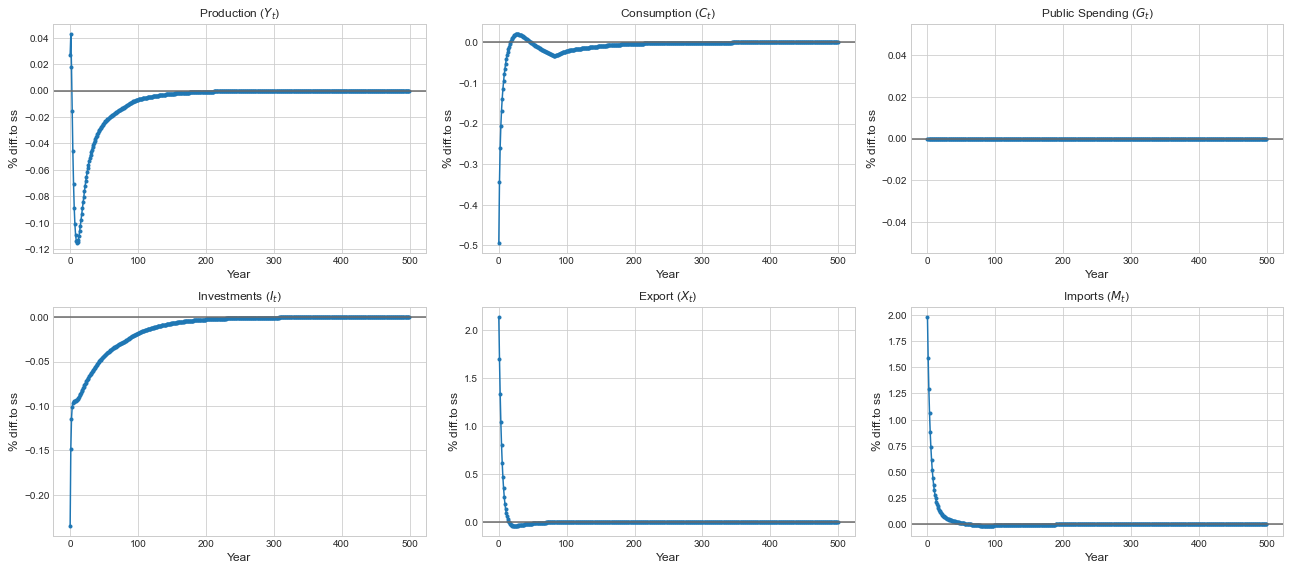

In [168]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'],T_IRF=par.T,ncol=3, folder="ExportShock", file="LongView")

## National Accouting - Prices

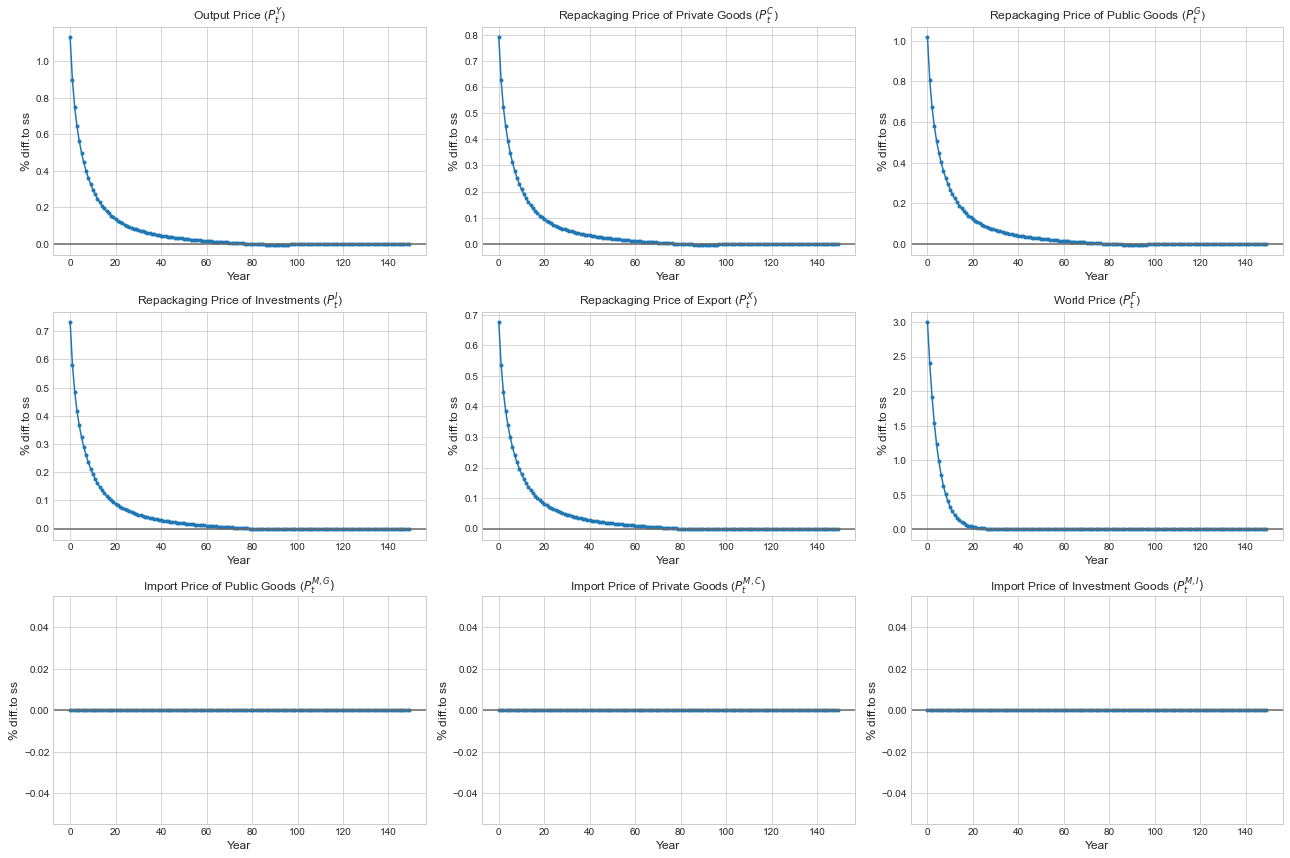

In [169]:
model.plot_IRF(varlist=['P_Y','P_C','P_G','P_I','P_X','P_F','P_M_G','P_M_C','P_M_I'],T_IRF=150,ncol=3, folder="ExportShock", file="Prices")

## Labor market

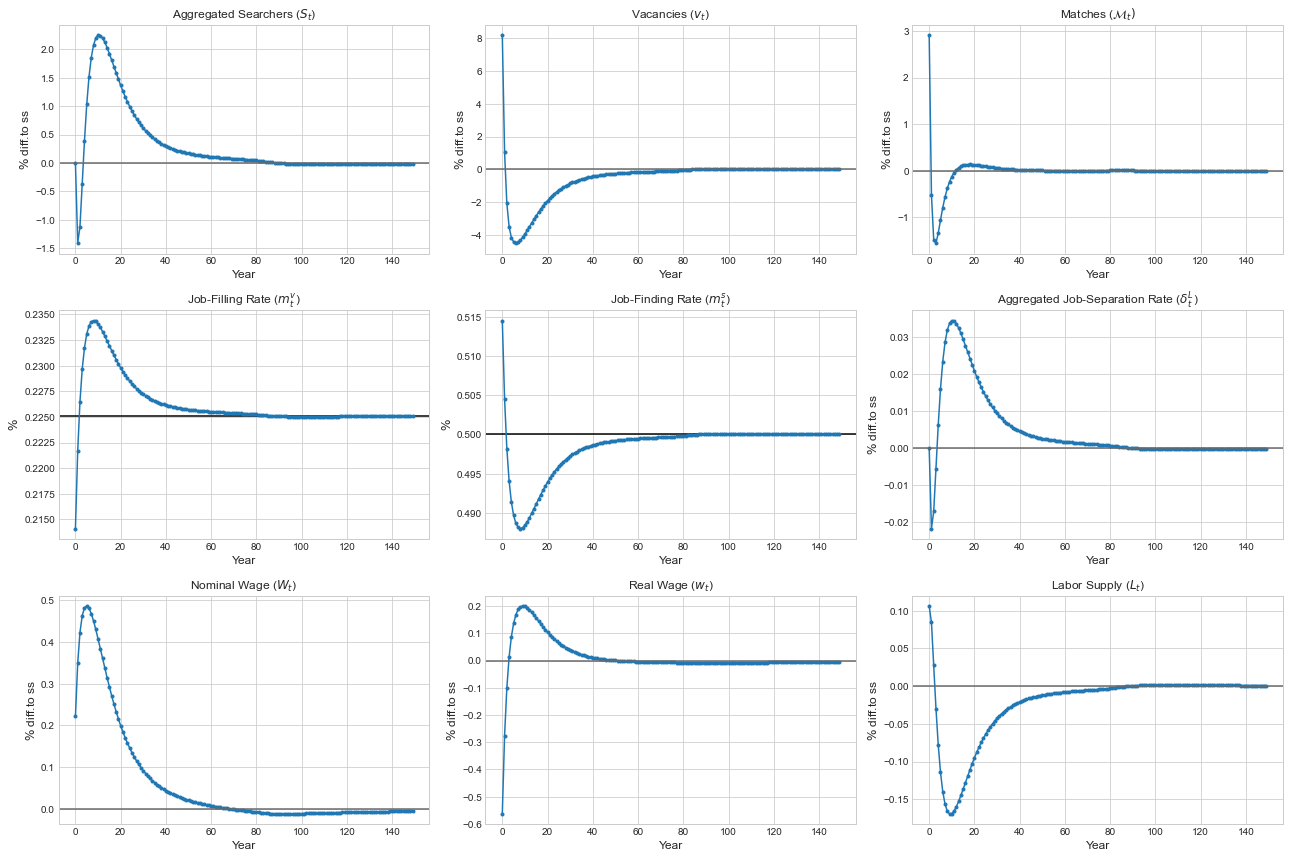

In [170]:
model.plot_IRF(varlist=['S','v','curlyM','m_v','m_s','delta_L','W','real_W','L'],abs=['m_v','m_s'],T_IRF=150,ncol=3, folder="ExportShock", file="LaborMarket")

## Production Firms

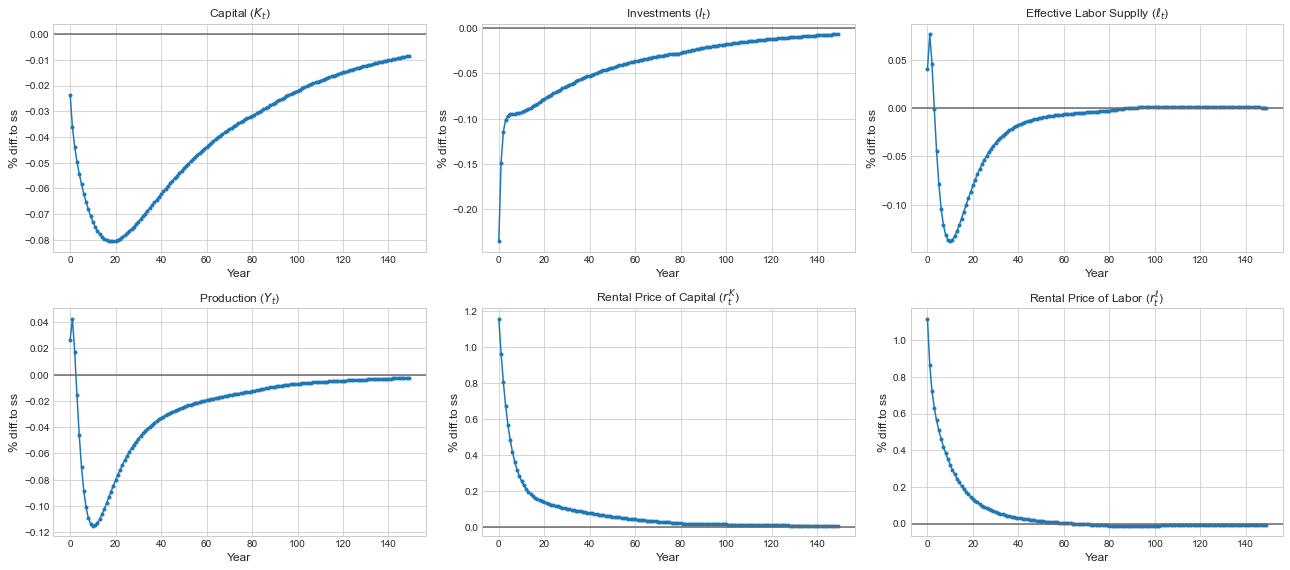

In [172]:
model.plot_IRF(varlist=['K','I','ell','Y','r_K','r_ell'],ncol=3,T_IRF=150, folder="ExportShock", file="ProductionFirms")

## Public Sector

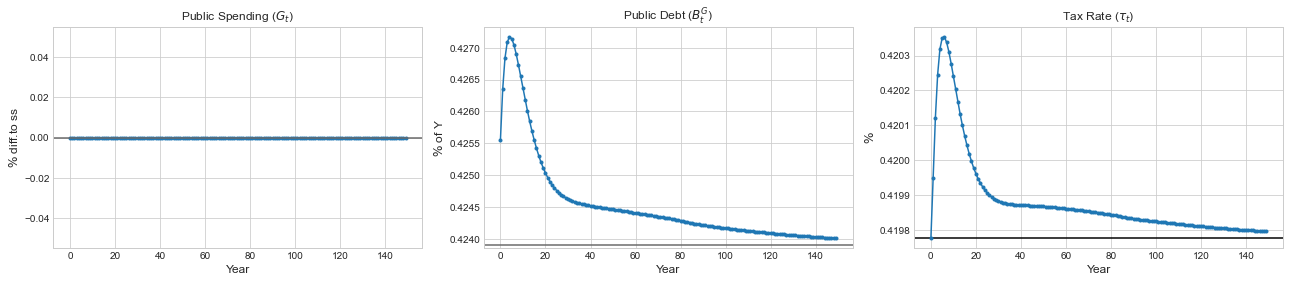

In [175]:
model.plot_IRF(varlist=['G','B_G','tau'],abs=['tau'],Y_share=['B_G'],T_IRF=150, folder="ExportShock", file="Government")

## Households - Aggregate

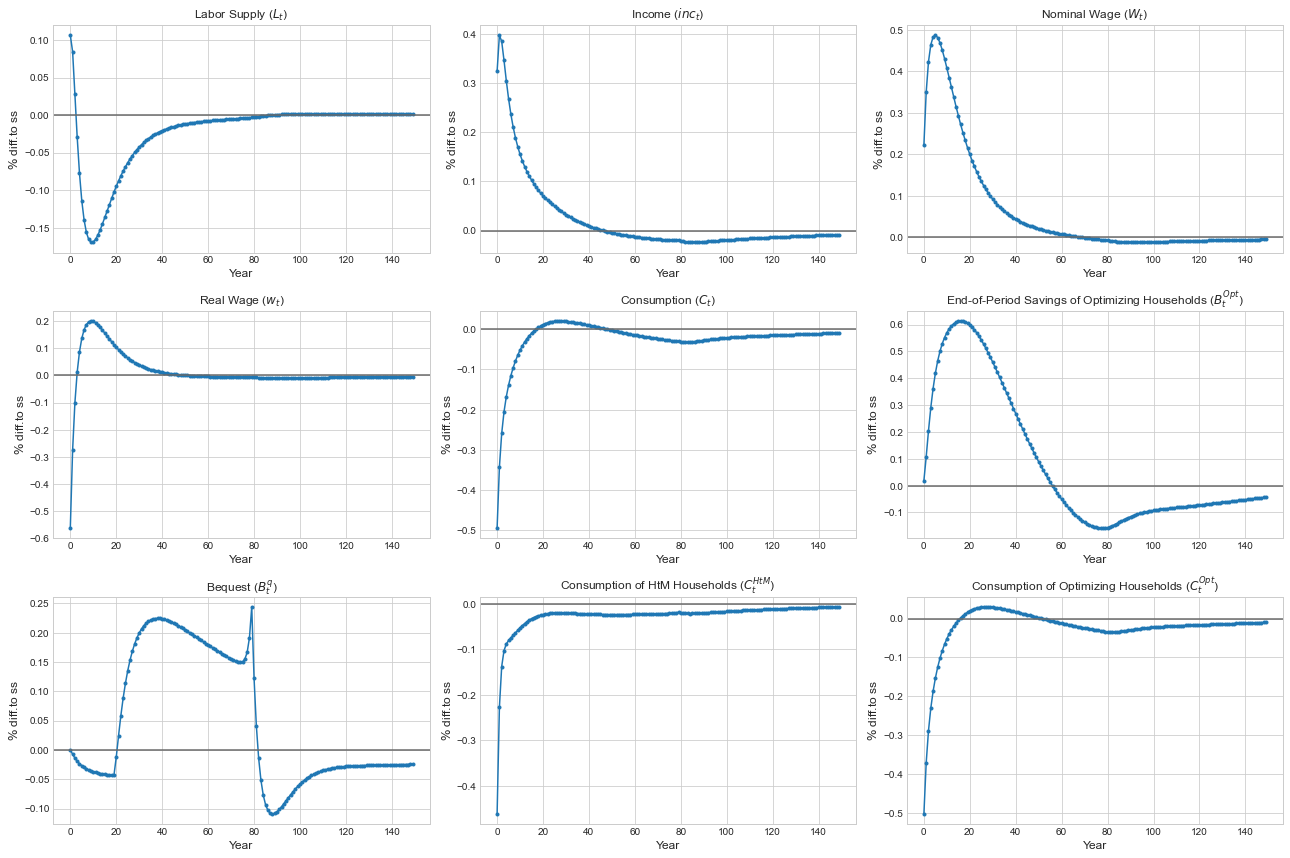

In [174]:
model.plot_IRF(varlist=['L','inc','W','real_W','C','B','Bq','C_HtM','C_R'],ncol=3, T_IRF = 150, folder="ExportShock", file="Households")

## Households - life-cycle

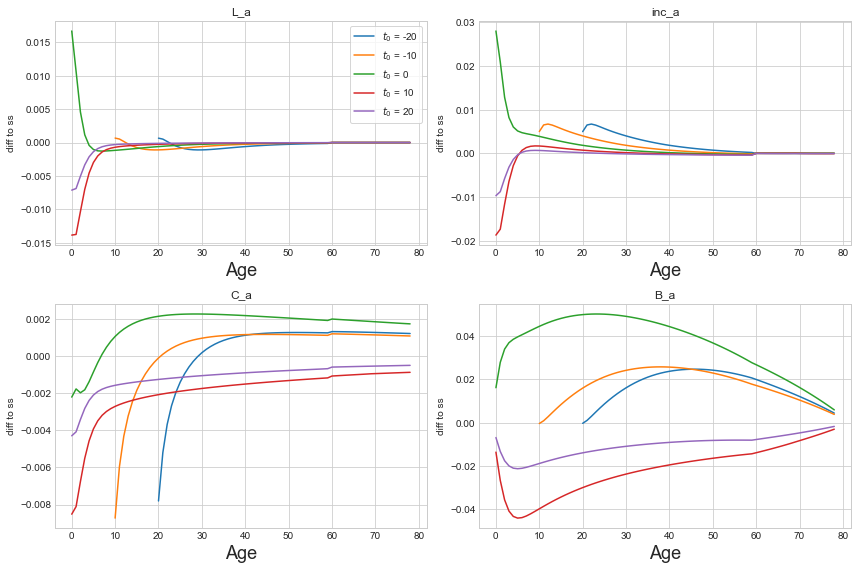

In [146]:
model.plot_IRF_hh(varlist=['L_a','inc_a','C_a','B_a'],t0_list=[-20,-10,0,10,20])

## Changing Elasticity of Repackaging Firms

In [ ]:
model.set_exo_ss() # reset 

In [ ]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()

In [ ]:
Models = [model, model1]     
Sigma_REPACK = [1.5, 2.5]
for i in range(len(Models)):
    Models[i].par.sigma_C = Sigma_REPACK[i]
    Models[i].par.sigma_G = Sigma_REPACK[i]
    Models[i].par.sigma_I = Sigma_REPACK[i]
    Models[i].par.sigma_X = Sigma_REPACK[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models1[i].sol.chi[:Tshock] = Models[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models[i].sol.P_F[:Tshock] = Models[i].ss.P_F + shock_p_f*persistence_p_f
    Models[i].find_IRF()

In [ ]:
Models[1].par.sigma_I

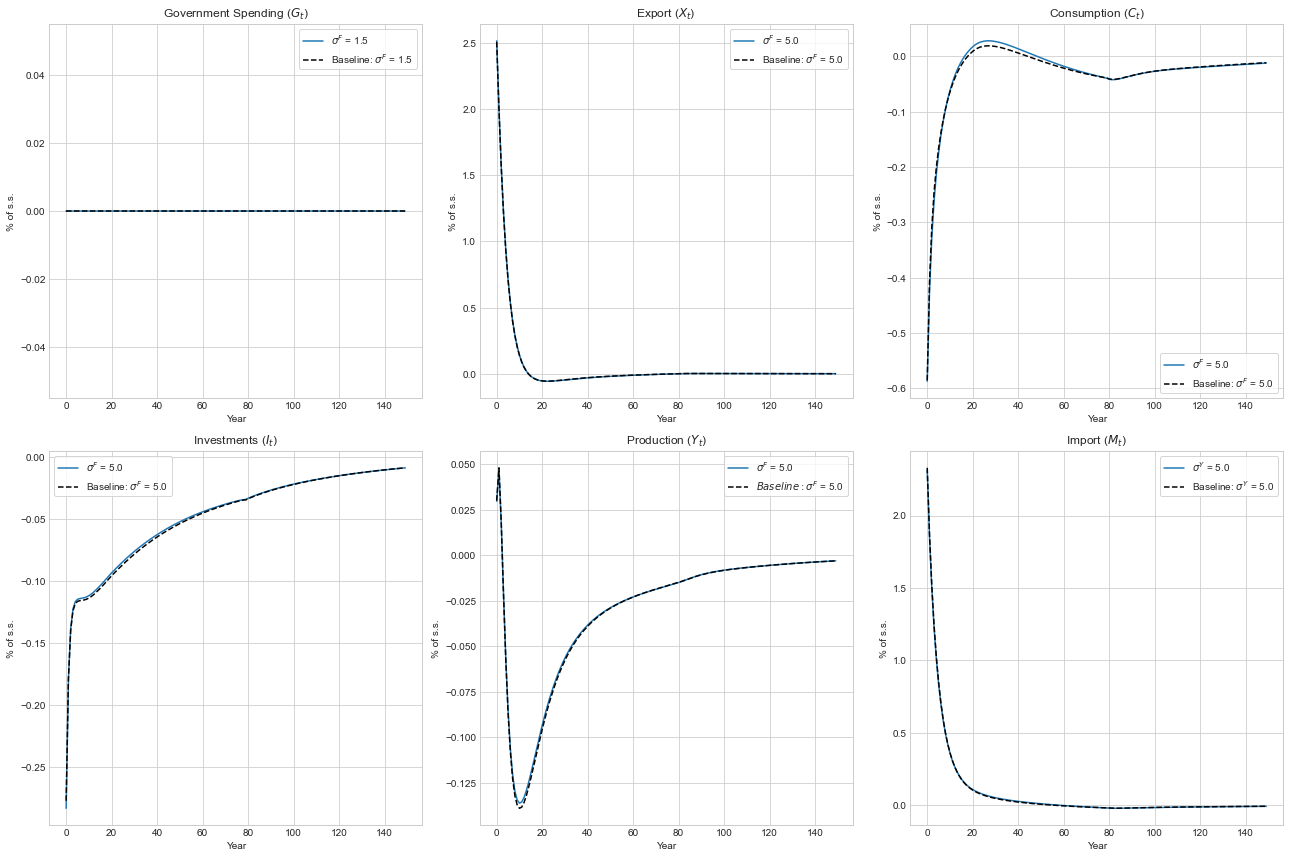

In [190]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(2,3,1)
ax.plot((Models[0].sol.G[:T_IRF]/Models[0].ss.G-1)*100,label=f'$\sigma^F$ = {Models[0].par.sigma_C}')
ax.plot((Models[1].sol.G[:T_IRF]/Models[1].ss.G-1)*100,label=f'Baseline: $\sigma^F$ = {Models[1].par.sigma_C}', color = 'k', linestyle = '--')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Government Spending ($G_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(2,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'$\sigma^F$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'Baseline: $\sigma^F$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Export ($X_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(2,3,3)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'$\sigma^F$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'Baseline: $\sigma^F$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Consumption ($C_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(2,3,4)
ax.plot((Models[0].sol.I[:T_IRF]/Models[0].ss.I-1)*100,label=f'$\sigma^F$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.I[:T_IRF]/Models[1].ss.I-1)*100,label=f'Baseline: $\sigma^F$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Investments ($I_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(2,3,5)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$\sigma^F$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$Baseline: \sigma^F$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(2,3,6)
ax.plot((Models[0].sol.M[:T_IRF]/Models[0].ss.M-1)*100,label=f'$\sigma^Y$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.M[:T_IRF]/Models[1].ss.M-1)*100,label=f'Baseline: $\sigma^Y$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Import ($M_t$)')
ax.legend(frameon=True)

# c. layout
fig.tight_layout(pad=1); # spacing between subplots
plt.savefig("RobustnessTestExportShock/SubstitutionRepack.pdf", format="pdf", bbox_inches="tight")

# Sensititivty Analysis to put in Text

## Overall Robustness

In [157]:
model.set_exo_ss() # reset 

In [158]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()
model3 = model.copy()
model4 = model.copy()
model5 = model.copy()
model6 = model.copy()
model7 = model.copy()
model8 = model.copy()
model9 = model.copy()
model10 = model.copy()
model11 = model.copy()
model12 = model.copy()
model13 = model.copy()
model14 = model.copy()

In [161]:
# for row 1
Models1 = [model, model1, model2]     
Sigma_F = [4.0, 5.0, 6.0]
for i in range(len(Models1)):
    Models1[i].par.sigma_F = Sigma_F[i]
    Models1[i].find_ss()
    Models1[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models1[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models1[i].sol.chi[:Tshock] = Models1[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models1[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models1[i].sol.P_F[:Tshock] = Models1[i].ss.P_F + shock_p_f*persistence_p_f
    Models1[i].find_IRF()

# for row 2
Models2 = [model3, model4, model5]
Sigma_m = [1.01, 1.50, 1.75] 
for i in range(len(Models2)):
    Models2[i].par.sigma_m = Sigma_m[i]
    Models2[i].find_ss()
    Models2[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models2[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models2[i].sol.chi[:Tshock] = Models2[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models2[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models2[i].sol.P_F[:Tshock] = Models2[i].ss.P_F + shock_p_f*persistence_p_f
    Models2[i].find_IRF()
    
# for row 3
Models3 = [model6, model7, model8]
Sigma_Y = [0.75, 1.01, 1.25] 
for i in range(len(Models3)):
    Models3[i].par.sigma_Y = Sigma_Y[i]
    Models3[i].find_ss()
    Models3[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models3[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models3[i].sol.chi[:Tshock] = Models3[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models3[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models3[i].sol.P_F[:Tshock] = Models3[i].ss.P_F + shock_p_f*persistence_p_f
    Models3[i].find_IRF()
    
# for row 4
Models4 = [model9, model10, model11] 
Lambda_B = [0.2, 0.5, 0.8] 
for i in range(len(Models4)):
    Models4[i].par.lambda_B = Lambda_B[i]
    Models4[i].find_ss()
    Models4[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models4[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models4[i].sol.chi[:Tshock] = Models4[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models4[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models4[i].sol.P_F[:Tshock] = Models4[i].ss.P_F + shock_p_f*persistence_p_f
    Models4[i].find_IRF()

# for row 5
Models5 = [model12, model13, model14]
Psi_0 = [3.0, 4.0, 15.0] 
for i in range(len(Models5)):
    Models5[i].par.Psi_0 = Psi_0[i]
    Models5[i].find_ss()
    Models5[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models5[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models5[i].sol.chi[:Tshock] = Models5[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models5[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models5[i].sol.P_F[:Tshock] = Models5[i].ss.P_F + shock_p_f*persistence_p_f
    Models5[i].find_IRF()

initial:
   max. abs. error = 2.12e+00
    0.00e+00 in bargaining_cond
    1.43e-11 in Bq_match
    4.44e-16 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    2.12e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.12e+00
    2.08e-04 in bargaining_cond
    2.40e-02 in Bq_match
    1.59e-04 in FOC_capital_agency
    5.43e-03 in FOC_K_ell
    1.11e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.11e-01
    2.42e-05 in bargaining_cond
    9.48e-04 in Bq_match
    2.41e-05 in FOC_capital_agency
    5.88e-04 in FOC_K_ell
    7.92e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 7.92e-03
    1.86e-06 in bargaining_cond
    9.08e-05 in Bq_match
    1.91e-06 in FOC_capital_agency
    4.37e-05 in FOC_K_ell
    6.16e-04 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

In [162]:
def get_key(varname):
        """ fetch name associated with variable """
        variabel_name = {"Export Elasticity":0,"Matching Elasticity":1, "Production Elasticity":2, "Tax Rigidity":3, "Capital Adjustment Costs":4}
        
        for key, value in variabel_name.items():
            if value == varname:
                 return key

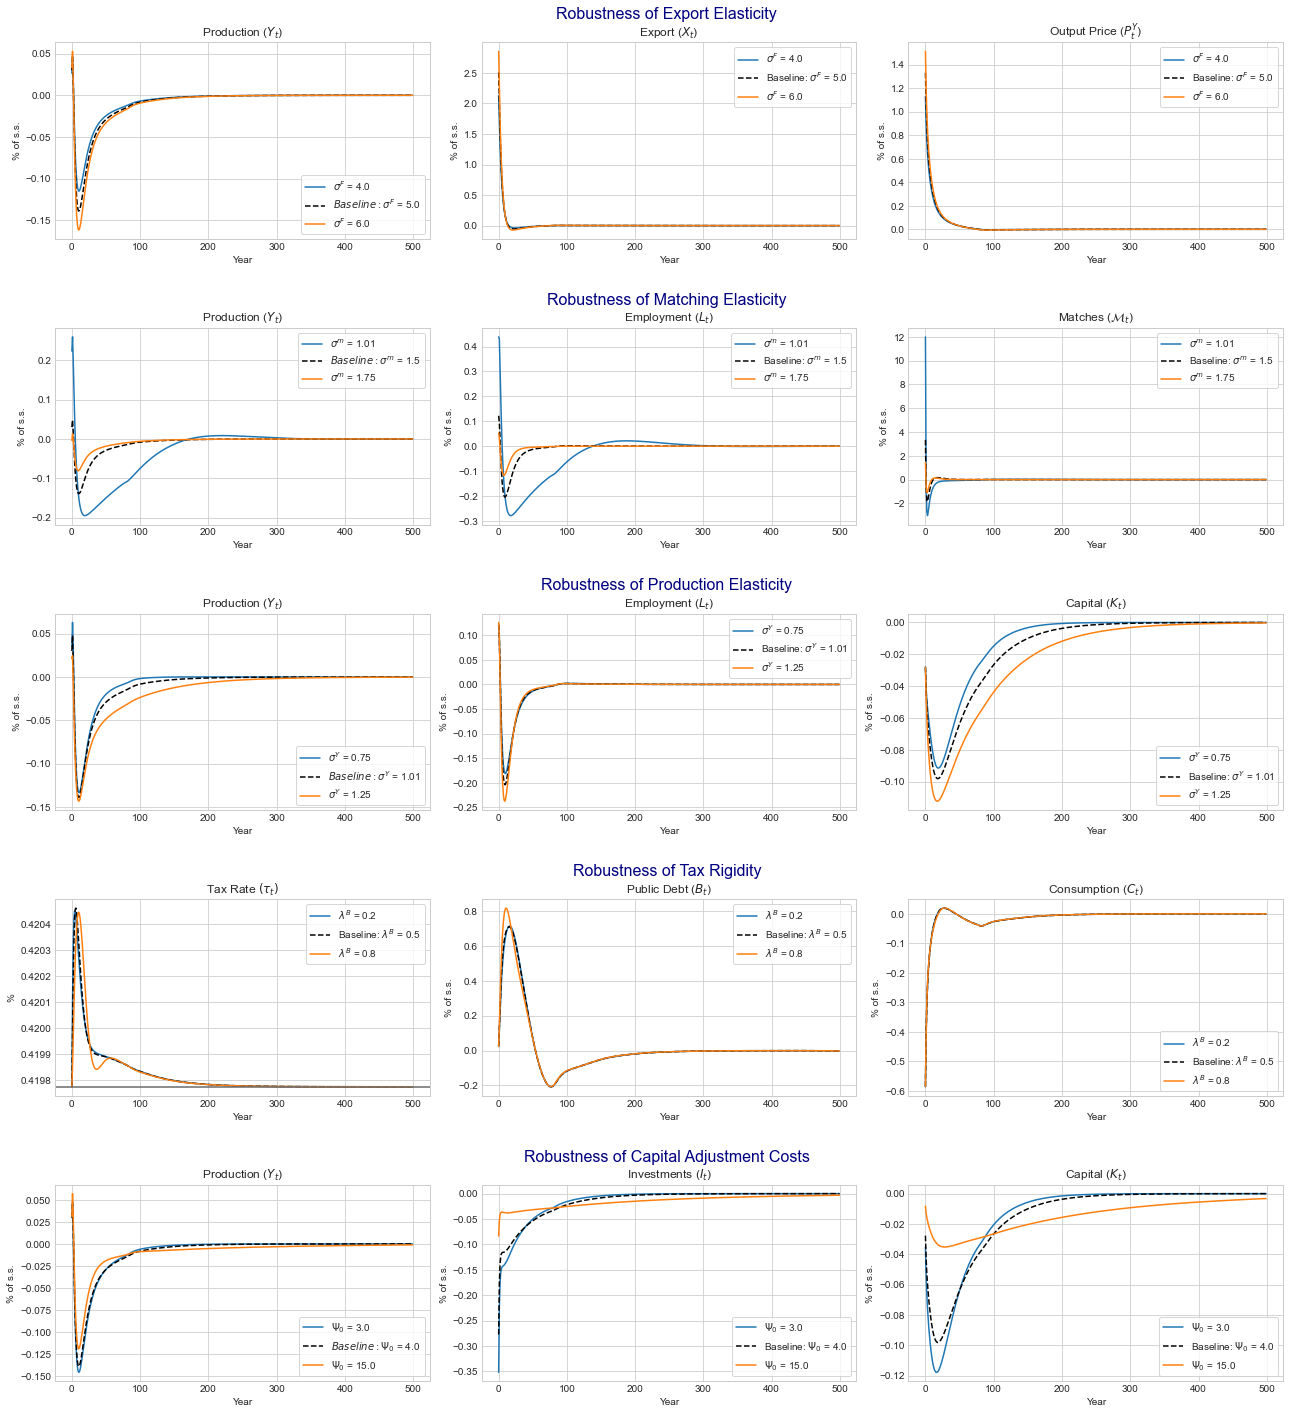

In [164]:
T_IRF = 500

# a. initiate figure
fig, big_axes = plt.subplots( figsize=(3*6,5*6/1.5), nrows=5, ncols = 1)

for cols, big_ax in enumerate(big_axes):
    big_ax.axis('off')
    for cols,big_ax in enumerate(big_axes):
        big_ax.set_title(f'Robustness of {get_key(cols)} \n', size = 16, color = 'navy')

# b. create subplots
# export Elasticity for row 1
ax = fig.add_subplot(5,3,1)
ax.plot((Models1[0].sol.Y[:T_IRF]/Models1[0].ss.Y-1)*100,label=f'$\sigma^F$ = {Models1[0].par.sigma_F}')
ax.plot((Models1[1].sol.Y[:T_IRF]/Models1[1].ss.Y-1)*100,label=f'$Baseline: \sigma^F$ = {Models1[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.plot((Models1[2].sol.Y[:T_IRF]/Models1[2].ss.Y-1)*100,label=f'$\sigma^F$ = {Models1[2].par.sigma_F}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(5,3,2)
ax.plot((Models1[0].sol.X[:T_IRF]/Models1[0].ss.X-1)*100,label=f'$\sigma^F$ = {Models1[0].par.sigma_F}')
ax.plot((Models1[1].sol.X[:T_IRF]/Models1[1].ss.X-1)*100,label=f'Baseline: $\sigma^F$ = {Models1[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.plot((Models1[2].sol.X[:T_IRF]/Models1[2].ss.X-1)*100,label=f'$\sigma^F$ = {Models1[2].par.sigma_F}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Export ($X_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(5,3,3)
ax.plot((Models1[0].sol.P_Y[:T_IRF]/Models1[0].ss.P_Y-1)*100,label=f'$\sigma^F$ = {Models1[0].par.sigma_F}')
ax.plot((Models1[1].sol.P_Y[:T_IRF]/Models1[1].ss.P_Y-1)*100,label=f'Baseline: $\sigma^F$ = {Models1[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.plot((Models1[2].sol.P_Y[:T_IRF]/Models1[2].ss.P_Y-1)*100,label=f'$\sigma^F$ = {Models1[2].par.sigma_F}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Output Price ($P^Y_{t}$)')
ax.legend(frameon=True)

# matching Elasticity for row 2
ax = fig.add_subplot(5,3,4)
ax.plot((Models2[0].sol.Y[:T_IRF]/Models2[0].ss.Y-1)*100,label=f'$\sigma^m$ = {Models2[0].par.sigma_m}')
ax.plot((Models2[1].sol.Y[:T_IRF]/Models2[1].ss.Y-1)*100,label=f'$Baseline: \sigma^m$ = {Models2[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot((Models2[2].sol.Y[:T_IRF]/Models2[2].ss.Y-1)*100,label=f'$\sigma^m$ = {Models2[2].par.sigma_m}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(5,3,5)
ax.plot((Models2[0].sol.L[:T_IRF]/Models2[0].ss.L-1)*100,label=f'$\sigma^m$ = {Models2[0].par.sigma_m}')
ax.plot((Models2[1].sol.L[:T_IRF]/Models2[1].ss.L-1)*100,label=f'Baseline: $\sigma^m$ = {Models2[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot((Models2[2].sol.L[:T_IRF]/Models2[2].ss.L-1)*100,label=f'$\sigma^m$ = {Models2[2].par.sigma_m}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Employment ($L_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(5,3,6)
ax.plot((Models2[0].sol.curlyM[:T_IRF]/Models2[0].ss.curlyM-1)*100,label=f'$\sigma^m$ = {Models2[0].par.sigma_m}')
ax.plot((Models2[1].sol.curlyM[:T_IRF]/Models2[1].ss.curlyM-1)*100,label=f'Baseline: $\sigma^m$ = {Models2[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot((Models2[2].sol.curlyM[:T_IRF]/Models2[2].ss.curlyM-1)*100,label=f'$\sigma^m$ = {Models2[2].par.sigma_m}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Matches ($\mathcal{M}_t$)')
ax.legend(frameon=True)

# output elasticity for row 3
ax = fig.add_subplot(5,3,7)
ax.plot((Models3[0].sol.Y[:T_IRF]/Models3[0].ss.Y-1)*100,label=f'$\sigma^Y$ = {Models3[0].par.sigma_Y}')
ax.plot((Models3[1].sol.Y[:T_IRF]/Models3[1].ss.Y-1)*100,label=f'$Baseline: \sigma^Y$ = {Models3[1].par.sigma_Y}', color = 'k', linestyle = '--')
ax.plot((Models3[2].sol.Y[:T_IRF]/Models3[2].ss.Y-1)*100,label=f'$\sigma^Y$ = {Models3[2].par.sigma_Y}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(5,3,8)
ax.plot((Models3[0].sol.L[:T_IRF]/Models3[0].ss.L-1)*100,label=f'$\sigma^Y$ = {Models3[0].par.sigma_Y}')
ax.plot((Models3[1].sol.L[:T_IRF]/Models3[1].ss.L-1)*100,label=f'Baseline: $\sigma^Y$ = {Models3[1].par.sigma_Y}', color = 'k', linestyle = '--')
ax.plot((Models3[2].sol.L[:T_IRF]/Models3[2].ss.L-1)*100,label=f'$\sigma^Y$ = {Models3[2].par.sigma_Y}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Employment ($L_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(5,3,9)
ax.plot((Models3[0].sol.K[:T_IRF]/Models3[0].ss.K-1)*100,label=f'$\sigma^Y$ = {Models3[0].par.sigma_Y}')
ax.plot((Models3[1].sol.K[:T_IRF]/Models3[1].ss.K-1)*100,label=f'Baseline: $\sigma^Y$ = {Models3[1].par.sigma_Y}', color = 'k', linestyle = '--')
ax.plot((Models3[2].sol.K[:T_IRF]/Models3[2].ss.K-1)*100,label=f'$\sigma^Y$ = {Models3[2].par.sigma_Y}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Capital ($K_t$)')
ax.legend(frameon=True)

# tax rigidity for row 4
ax = fig.add_subplot(5,3,10)
ax.plot(Models4[0].sol.tau[:T_IRF],label=f'$\lambda^B$ = {Models4[0].par.lambda_B}')
ax.plot(Models4[1].sol.tau[:T_IRF],label=f'Baseline: $\lambda^B$ = {Models4[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot(Models4[2].sol.tau[:T_IRF],label=f'$\lambda^B$ = {Models4[2].par.lambda_B}')
ax.set_ylabel('%')
ax.set_xlabel('Year')
ax.set_title('Tax Rate'+r' $ (\tau_t) $')
ax.axhline(y=Models4[1].ss.tau, color ='dimgrey')
ax.legend(frameon=True)

ax = fig.add_subplot(5,3,11)
ax.plot((Models4[0].sol.B[:T_IRF]/Models4[0].ss.B-1)*100,label=f'$\lambda^B$ = {Models4[0].par.lambda_B}')
ax.plot((Models4[1].sol.B[:T_IRF]/Models4[1].ss.B-1)*100,label=f'Baseline: $\lambda^B$ = {Models4[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models4[2].sol.B[:T_IRF]/Models4[2].ss.B-1)*100,label=f'$\lambda^B$ = {Models4[2].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Public Debt ($B_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(5,3,12)
ax.plot((Models4[0].sol.C[:T_IRF]/Models4[0].ss.C-1)*100,label=f'$\lambda^B$ = {Models4[0].par.lambda_B}')
ax.plot((Models4[1].sol.C[:T_IRF]/Models4[1].ss.C-1)*100,label=f'Baseline: $\lambda^B$ = {Models4[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models4[2].sol.C[:T_IRF]/Models4[2].ss.C-1)*100,label=f'$\lambda^B$ = {Models4[2].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Consumption ($C_{t}$)')
ax.legend(frameon=True)

# capital adjustment costs for row 5
ax = fig.add_subplot(5,3,13)
ax.plot((Models5[0].sol.Y[:T_IRF]/Models5[0].ss.Y-1)*100,label=f'$\Psi_0$ = {Models5[0].par.Psi_0}')
ax.plot((Models5[1].sol.Y[:T_IRF]/Models5[1].ss.Y-1)*100,label=f'$Baseline: \Psi_0$ = {Models5[1].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models5[2].sol.Y[:T_IRF]/Models5[2].ss.Y-1)*100,label=f'$\Psi_0$ = {Models5[2].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(5,3,14)
ax.plot((Models5[0].sol.I[:T_IRF]/Models5[0].ss.I-1)*100,label=f'$\Psi_0$ = {Models5[0].par.Psi_0}')
ax.plot((Models5[1].sol.I[:T_IRF]/Models5[1].ss.I-1)*100,label=f'Baseline: $\Psi_0$ = {Models5[1].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models5[2].sol.I[:T_IRF]/Models5[2].ss.I-1)*100,label=f'$\Psi_0$ = {Models5[2].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Investments ($I_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(5,3,15)
ax.plot((Models5[0].sol.K[:T_IRF]/Models5[0].ss.K-1)*100,label=f'$\Psi_0$ = {Models5[0].par.Psi_0}')
ax.plot((Models5[1].sol.K[:T_IRF]/Models5[1].ss.K-1)*100,label=f'Baseline: $\Psi_0$ = {Models5[1].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models5[2].sol.K[:T_IRF]/Models5[2].ss.K-1)*100,label=f'$\Psi_0$ = {Models5[2].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Capital ($K_t$)')
ax.legend(frameon=True)

# c. layout
fig.tight_layout(pad=1); # spacing between subplots
plt.savefig("RobustnessTestExportShock/RobustnessAllShocksExport.pdf", format="pdf", bbox_inches="tight")

## Change in HtM-Share - An Amplifier

In [153]:
model.set_exo_ss() # reset 

In [154]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()

In [155]:
Models = [model, model1, model2]
Lambda = [0.05, 0.2, 0.5] 
    
for i in range(len(Models)):
    Models[i].par.Lambda = Lambda[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models[i].sol.chi[:Tshock] = Models[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models[i].sol.P_F[:Tshock] = Models[i].ss.P_F + shock_p_f*persistence_p_f
    Models[i].find_IRF()

initial:
   max. abs. error = 2.63e+00
    0.00e+00 in bargaining_cond
    1.76e-11 in Bq_match
    4.44e-16 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    2.63e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.2 secs
   max. abs. error = 2.63e+00
    2.84e-04 in bargaining_cond
    3.93e-02 in Bq_match
    2.23e-04 in FOC_capital_agency
    7.45e-03 in FOC_K_ell
    1.76e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.3 secs
   max. abs. error = 1.76e-01
    3.84e-05 in bargaining_cond
    1.81e-03 in Bq_match
    3.94e-05 in FOC_capital_agency
    9.36e-04 in FOC_K_ell
    1.32e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.2 secs
   max. abs. error = 1.32e-02
    2.92e-06 in bargaining_cond
    2.00e-04 in Bq_match
    3.09e-06 in FOC_capital_agency
    6.80e-05 in FOC_K_ell
    1.06e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

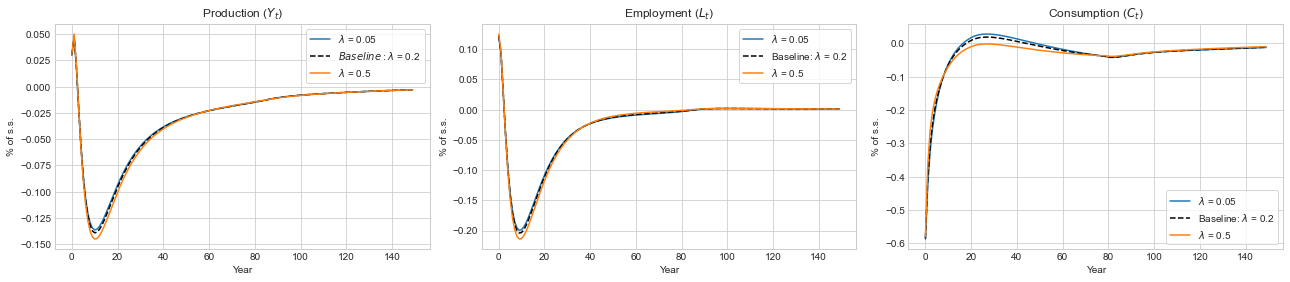

In [156]:
T_IRF = 150

# a. iniate figure
fig = plt.figure(figsize=(3*6,1*6/1.5))

# b. create subplots
ax = fig.add_subplot(1,3,1)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$Baseline: \lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(1,3,2)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'Baseline: $\lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Employment ($L_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(1,3,3)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'Baseline: $\lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Consumption ($C_{t}$)')
ax.legend(frameon=True)

# c. layout
fig.tight_layout(pad=1); # spacing between subplots
plt.savefig("ExportShock/HtM_Share.pdf", format="pdf", bbox_inches="tight")

# Sensitivity Analysis - Background

## Change in Elasticity of Export

In [39]:
model.set_exo_ss() # reset 

In [40]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()

In [41]:
Models = [model, model1, model2] #Create list of the models
Sigma_F = [4.0, 5.0, 6.0] #Create list of Lambda values
    
for i in range(len(Models)):
    Models[i].par.sigma_F = Sigma_F[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models[i].sol.chi[:Tshock] = Models[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models[i].sol.P_F[:Tshock] = Models[i].ss.P_F + shock_p_f*persistence_p_f
    Models[i].find_IRF()

initial:
   max. abs. error = 2.12e+00
    0.00e+00 in bargaining_cond
    1.43e-11 in Bq_match
    4.44e-16 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    2.12e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.12e+00
    2.08e-04 in bargaining_cond
    2.40e-02 in Bq_match
    1.59e-04 in FOC_capital_agency
    5.43e-03 in FOC_K_ell
    1.11e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.11e-01
    2.42e-05 in bargaining_cond
    9.48e-04 in Bq_match
    2.41e-05 in FOC_capital_agency
    5.88e-04 in FOC_K_ell
    7.92e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 7.92e-03
    1.86e-06 in bargaining_cond
    9.08e-05 in Bq_match
    1.91e-06 in FOC_capital_agency
    4.37e-05 in FOC_K_ell
    6.16e-04 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

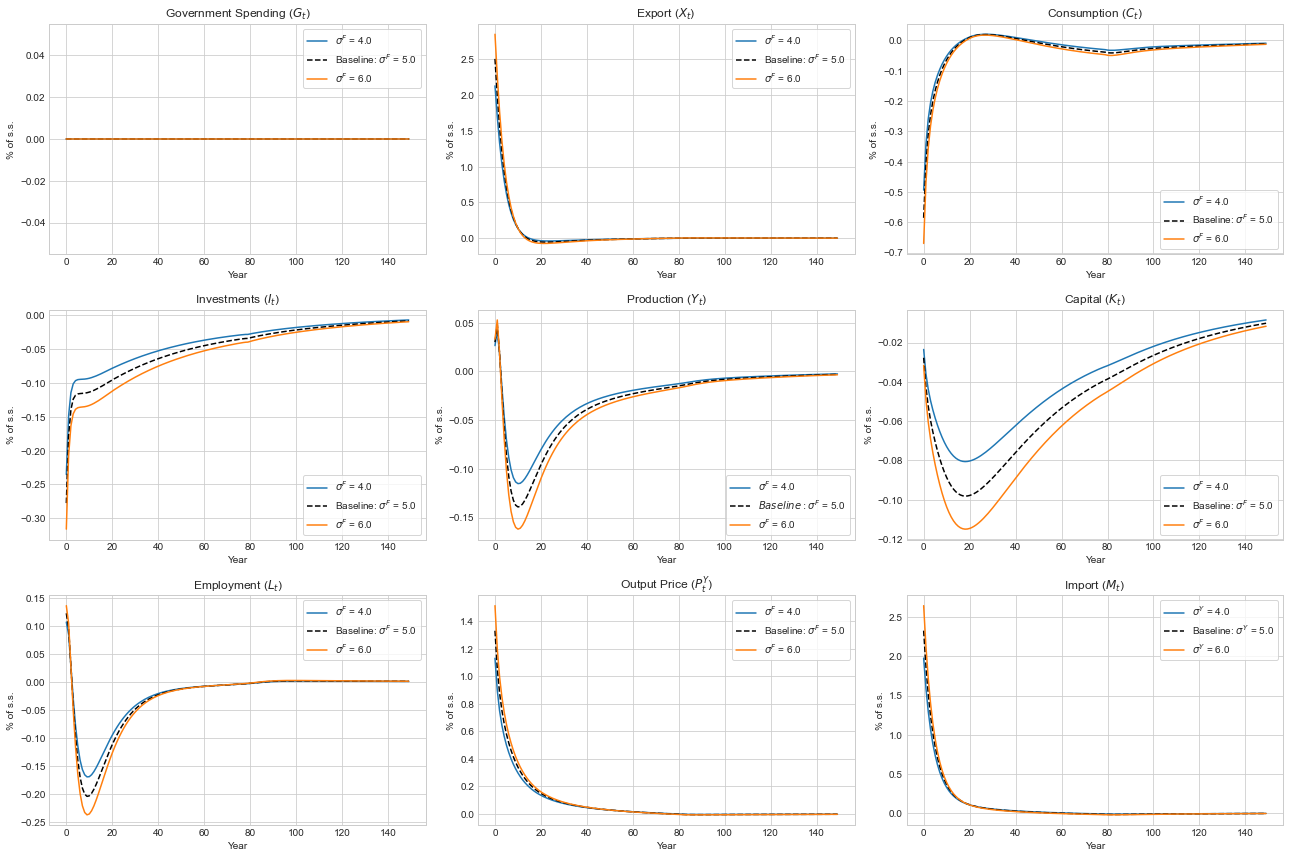

In [42]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,3,1)
ax.plot((Models[0].sol.G[:T_IRF]/Models[0].ss.G-1)*100,label=f'$\sigma^F$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.G[:T_IRF]/Models[1].ss.G-1)*100,label=f'Baseline: $\sigma^F$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.G[:T_IRF]/Models[2].ss.G-1)*100,label=f'$\sigma^F$ = {Models[2].par.sigma_F}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Government Spending ($G_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'$\sigma^F$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'Baseline: $\sigma^F$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\sigma^F$ = {Models[2].par.sigma_F}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Export ($X_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,3)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'$\sigma^F$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'Baseline: $\sigma^F$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\sigma^F$ = {Models[2].par.sigma_F}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Consumption ($C_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,4)
ax.plot((Models[0].sol.I[:T_IRF]/Models[0].ss.I-1)*100,label=f'$\sigma^F$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.I[:T_IRF]/Models[1].ss.I-1)*100,label=f'Baseline: $\sigma^F$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.I[:T_IRF]/Models[2].ss.I-1)*100,label=f'$\sigma^F$ = {Models[2].par.sigma_F}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Investments ($I_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,5)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$\sigma^F$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$Baseline: \sigma^F$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\sigma^F$ = {Models[2].par.sigma_F}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,6)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'$\sigma^F$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'Baseline: $\sigma^F$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\sigma^F$ = {Models[2].par.sigma_F}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Capital ($K_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,7)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'$\sigma^F$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'Baseline: $\sigma^F$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\sigma^F$ = {Models[2].par.sigma_F}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Employment ($L_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,8)
ax.plot((Models[0].sol.P_Y[:T_IRF]/Models[0].ss.P_Y-1)*100,label=f'$\sigma^F$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.P_Y[:T_IRF]/Models[1].ss.P_Y-1)*100,label=f'Baseline: $\sigma^F$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.P_Y[:T_IRF]/Models[2].ss.P_Y-1)*100,label=f'$\sigma^F$ = {Models[2].par.sigma_F}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Output Price ($P^Y_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,9)
ax.plot((Models[0].sol.M[:T_IRF]/Models[0].ss.M-1)*100,label=f'$\sigma^Y$ = {Models[0].par.sigma_F}')
ax.plot((Models[1].sol.M[:T_IRF]/Models[1].ss.M-1)*100,label=f'Baseline: $\sigma^Y$ = {Models[1].par.sigma_F}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.M[:T_IRF]/Models[2].ss.M-1)*100,label=f'$\sigma^Y$ = {Models[2].par.sigma_F}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Import ($M_t$)')
ax.legend(frameon=True)

# c. layout
fig.tight_layout(pad=1); # spacing between subplots
plt.savefig("RobustnessTestExportShock/Export_Elasticity.pdf", format="pdf", bbox_inches="tight")

## Change in Matching Elasticity

In [43]:
model.set_exo_ss() # reset 

In [44]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()

In [45]:
Models = [model, model1, model2]
Sigma_m = [1.01, 1.50, 1.75] 
    
for i in range(len(Models)):
    Models[i].par.sigma_m = Sigma_m[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models[i].sol.chi[:Tshock] = Models[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models[i].sol.P_F[:Tshock] = Models[i].ss.P_F + shock_p_f*persistence_p_f
    Models[i].find_IRF()

initial:
   max. abs. error = 2.64e+00
    0.00e+00 in bargaining_cond
    1.41e-11 in Bq_match
    2.22e-16 in FOC_capital_agency
    5.33e-15 in FOC_K_ell
    2.64e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.64e+00
    5.20e-04 in bargaining_cond
    1.15e-01 in Bq_match
    2.93e-04 in FOC_capital_agency
    1.27e-02 in FOC_K_ell
    2.31e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.31e-01
    2.12e-04 in bargaining_cond
    4.60e-02 in Bq_match
    1.26e-04 in FOC_capital_agency
    4.94e-03 in FOC_K_ell
    7.48e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 7.48e-02
    6.60e-06 in bargaining_cond
    1.92e-03 in Bq_match
    4.19e-06 in FOC_capital_agency
    1.42e-04 in FOC_K_ell
    2.18e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

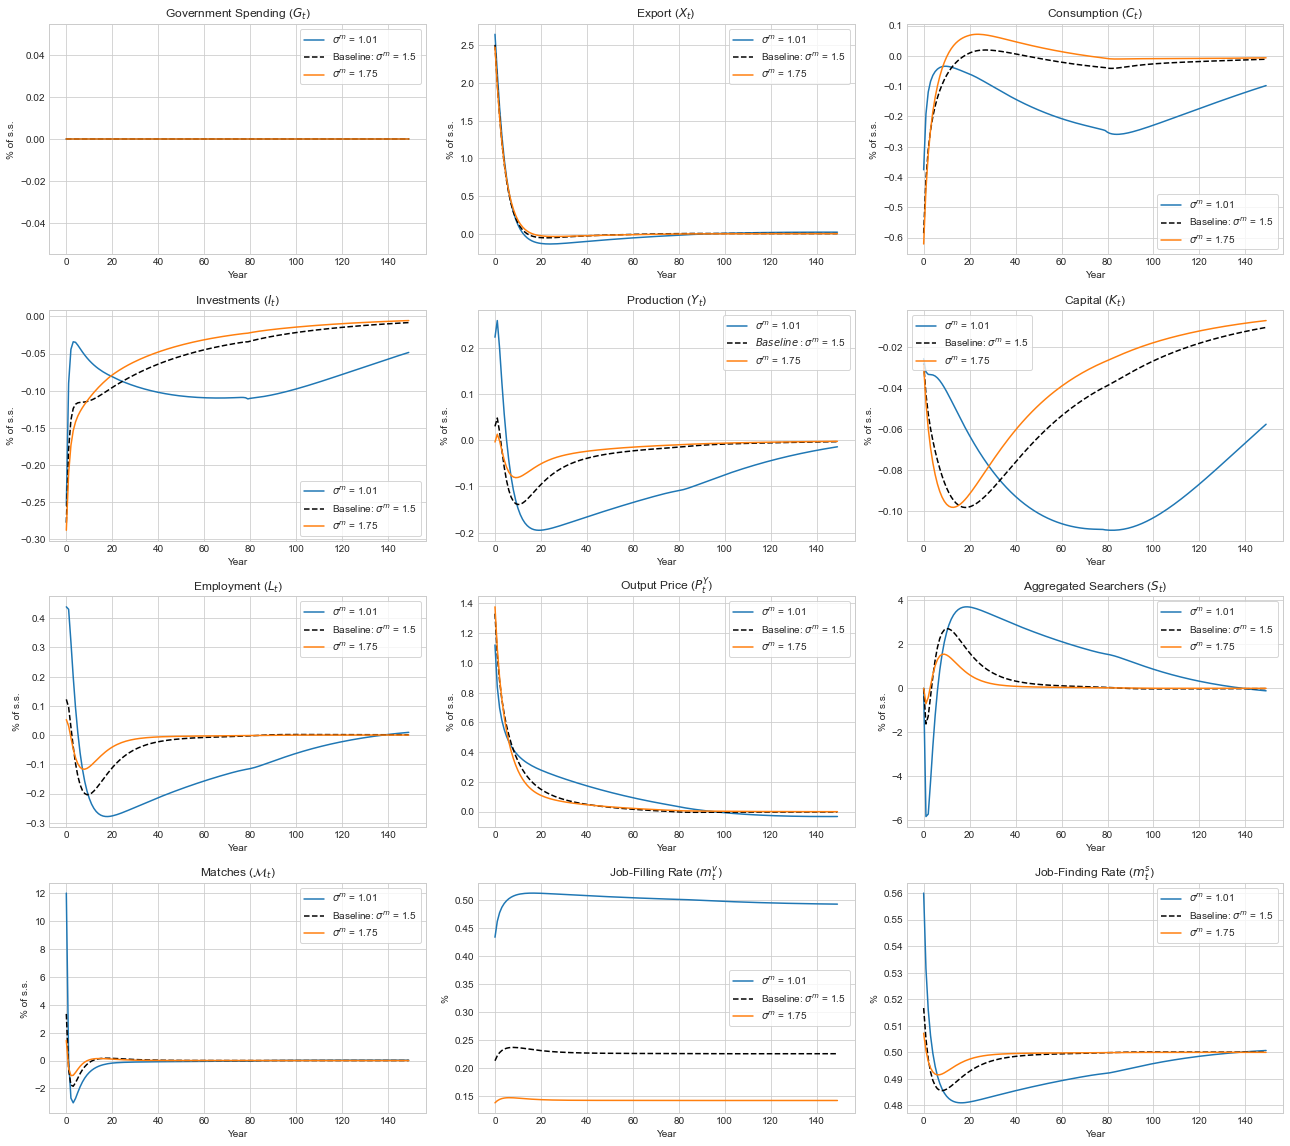

In [46]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,4*6/1.5))

ax = fig.add_subplot(4,3,1)
ax.plot((Models[0].sol.G[:T_IRF]/Models[0].ss.G-1)*100,label=f'$\sigma^m$ = {Models[0].par.sigma_m}')
ax.plot((Models[1].sol.G[:T_IRF]/Models[1].ss.G-1)*100,label=f'Baseline: $\sigma^m$ = {Models[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.G[:T_IRF]/Models[2].ss.G-1)*100,label=f'$\sigma^m$ = {Models[2].par.sigma_m}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Government Spending ($G_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'$\sigma^m$ = {Models[0].par.sigma_m}')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'Baseline: $\sigma^m$ = {Models[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\sigma^m$ = {Models[2].par.sigma_m}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Export ($X_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,3)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'$\sigma^m$ = {Models[0].par.sigma_m}')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'Baseline: $\sigma^m$ = {Models[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\sigma^m$ = {Models[2].par.sigma_m}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Consumption ($C_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,4)
ax.plot((Models[0].sol.I[:T_IRF]/Models[0].ss.I-1)*100,label=f'$\sigma^m$ = {Models[0].par.sigma_m}')
ax.plot((Models[1].sol.I[:T_IRF]/Models[1].ss.I-1)*100,label=f'Baseline: $\sigma^m$ = {Models[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.I[:T_IRF]/Models[2].ss.I-1)*100,label=f'$\sigma^m$ = {Models[2].par.sigma_m}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Investments ($I_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,5)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$\sigma^m$ = {Models[0].par.sigma_m}')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$Baseline: \sigma^m$ = {Models[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\sigma^m$ = {Models[2].par.sigma_m}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,6)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'$\sigma^m$ = {Models[0].par.sigma_m}')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'Baseline: $\sigma^m$ = {Models[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\sigma^m$ = {Models[2].par.sigma_m}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Capital ($K_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,7)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'$\sigma^m$ = {Models[0].par.sigma_m}')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'Baseline: $\sigma^m$ = {Models[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\sigma^m$ = {Models[2].par.sigma_m}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Employment ($L_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,8)
ax.plot((Models[0].sol.P_Y[:T_IRF]/Models[0].ss.P_Y-1)*100,label=f'$\sigma^m$ = {Models[0].par.sigma_m}')
ax.plot((Models[1].sol.P_Y[:T_IRF]/Models[1].ss.P_Y-1)*100,label=f'Baseline: $\sigma^m$ = {Models[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.P_Y[:T_IRF]/Models[2].ss.P_Y-1)*100,label=f'$\sigma^m$ = {Models[2].par.sigma_m}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Output Price ($P^Y_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,9)
ax.plot((Models[0].sol.S[:T_IRF]/Models[0].ss.S-1)*100,label=f'$\sigma^m$ = {Models[0].par.sigma_m}')
ax.plot((Models[1].sol.S[:T_IRF]/Models[1].ss.S-1)*100,label=f'Baseline: $\sigma^m$ = {Models[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.S[:T_IRF]/Models[2].ss.S-1)*100,label=f'$\sigma^m$ = {Models[2].par.sigma_m}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Aggregated Searchers ($S_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,10)
ax.plot((Models[0].sol.curlyM[:T_IRF]/Models[0].ss.curlyM-1)*100,label=f'$\sigma^m$ = {Models[0].par.sigma_m}')
ax.plot((Models[1].sol.curlyM[:T_IRF]/Models[1].ss.curlyM-1)*100,label=f'Baseline: $\sigma^m$ = {Models[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.curlyM[:T_IRF]/Models[2].ss.curlyM-1)*100,label=f'$\sigma^m$ = {Models[2].par.sigma_m}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Matches ($\mathcal{M}_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,11)
ax.plot(Models[0].sol.m_v[:T_IRF],label=f'$\sigma^m$ = {Models[0].par.sigma_m}')
ax.plot(Models[1].sol.m_v[:T_IRF],label=f'Baseline: $\sigma^m$ = {Models[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot(Models[2].sol.m_v[:T_IRF],label=f'$\sigma^m$ = {Models[2].par.sigma_m}')
ax.set_ylabel('%')
ax.set_xlabel('Year')
ax.set_title('Job-Filling Rate ($m^v_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,12)
ax.plot(Models[0].sol.m_s[:T_IRF],label=f'$\sigma^m$ = {Models[0].par.sigma_m}')
ax.plot(Models[1].sol.m_s[:T_IRF],label=f'Baseline: $\sigma^m$ = {Models[1].par.sigma_m}', color = 'k', linestyle = '--')
ax.plot(Models[2].sol.m_s[:T_IRF],label=f'$\sigma^m$ = {Models[2].par.sigma_m}')
ax.set_ylabel('%')
ax.set_xlabel('Year')
ax.set_title('Job-Finding Rate ($m^s_{t}$)')
ax.legend(frameon=True)

# c. layout
fig.tight_layout(pad=1); # spacing between subplots
plt.savefig("RobustnessTestExportShock/Matching_Elasticity.pdf", format="pdf", bbox_inches="tight")

## Change in Elasticity of Production

In [47]:
model.set_exo_ss() # reset 

In [48]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()

In [49]:
Models = [model, model1, model2]
Sigma_Y = [0.75, 1.01, 1.25] 
    
for i in range(len(Models)):
    Models[i].par.sigma_Y = Sigma_Y[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models[i].sol.chi[:Tshock] = Models[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models[i].sol.P_F[:Tshock] = Models[i].ss.P_F + shock_p_f*persistence_p_f
    Models[i].find_IRF()

initial:
   max. abs. error = 1.36e+00
    1.33e-15 in bargaining_cond
    9.59e-12 in Bq_match
    2.66e-15 in FOC_capital_agency
    9.33e-15 in FOC_K_ell
    1.36e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.36e+00
    2.37e-04 in bargaining_cond
    2.25e-02 in Bq_match
    2.49e-04 in FOC_capital_agency
    1.90e-03 in FOC_K_ell
    9.82e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 9.82e-02
    3.51e-05 in bargaining_cond
    1.62e-03 in Bq_match
    4.62e-05 in FOC_capital_agency
    2.63e-04 in FOC_K_ell
    9.41e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 9.41e-03
    3.40e-06 in bargaining_cond
    1.48e-04 in Bq_match
    4.76e-06 in FOC_capital_agency
    2.46e-05 in FOC_K_ell
    9.06e-04 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

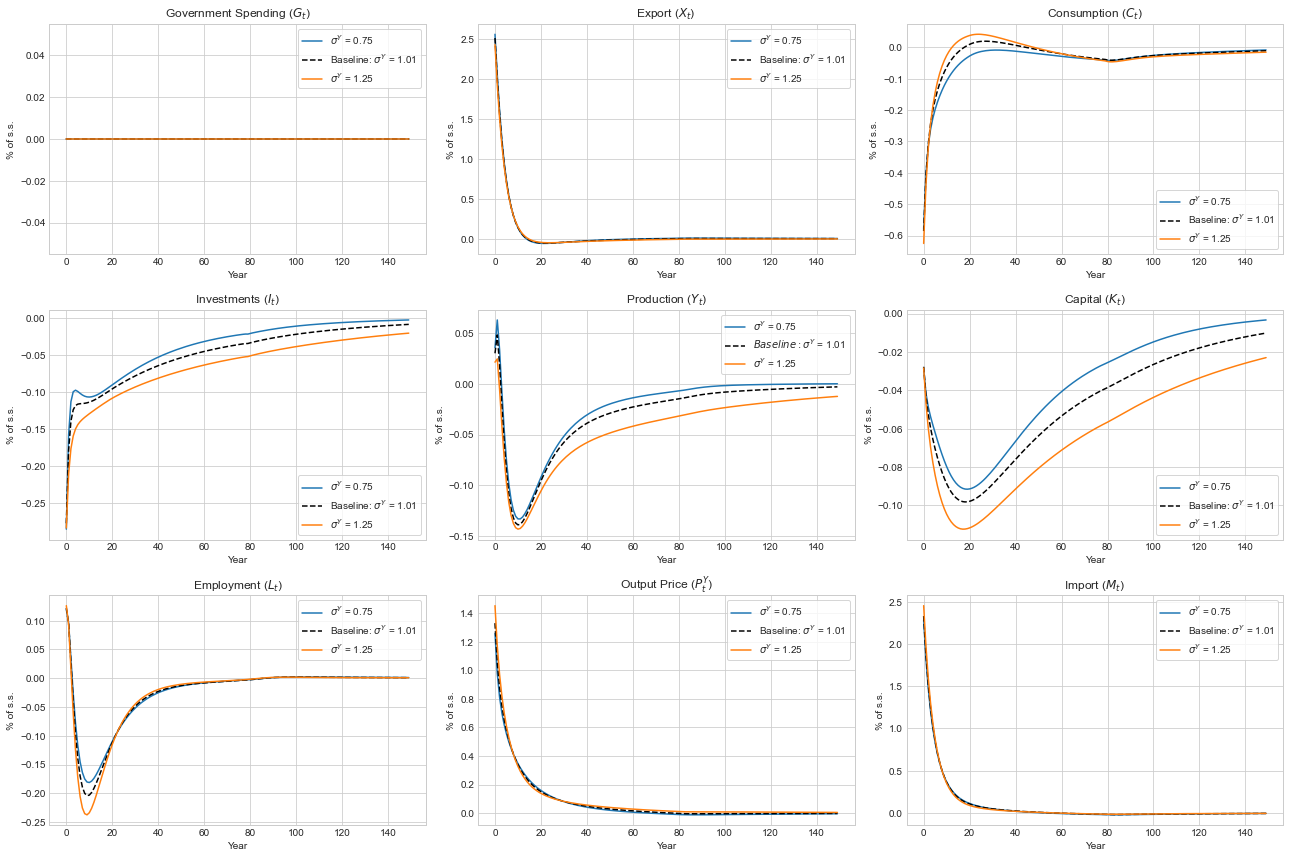

In [50]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,3,1)
ax.plot((Models[0].sol.G[:T_IRF]/Models[0].ss.G-1)*100,label=f'$\sigma^Y$ = {Models[0].par.sigma_Y}')
ax.plot((Models[1].sol.G[:T_IRF]/Models[1].ss.G-1)*100,label=f'Baseline: $\sigma^Y$ = {Models[1].par.sigma_Y}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.G[:T_IRF]/Models[2].ss.G-1)*100,label=f'$\sigma^Y$ = {Models[2].par.sigma_Y}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Government Spending ($G_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'$\sigma^Y$ = {Models[0].par.sigma_Y}')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'Baseline: $\sigma^Y$ = {Models[1].par.sigma_Y}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\sigma^Y$ = {Models[2].par.sigma_Y}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Export ($X_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,3)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'$\sigma^Y$ = {Models[0].par.sigma_Y}')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'Baseline: $\sigma^Y$ = {Models[1].par.sigma_Y}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\sigma^Y$ = {Models[2].par.sigma_Y}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Consumption ($C_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,4)
ax.plot((Models[0].sol.I[:T_IRF]/Models[0].ss.I-1)*100,label=f'$\sigma^Y$ = {Models[0].par.sigma_Y}')
ax.plot((Models[1].sol.I[:T_IRF]/Models[1].ss.I-1)*100,label=f'Baseline: $\sigma^Y$ = {Models[1].par.sigma_Y}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.I[:T_IRF]/Models[2].ss.I-1)*100,label=f'$\sigma^Y$ = {Models[2].par.sigma_Y}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Investments ($I_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,5)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$\sigma^Y$ = {Models[0].par.sigma_Y}')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$Baseline: \sigma^Y$ = {Models[1].par.sigma_Y}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\sigma^Y$ = {Models[2].par.sigma_Y}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,6)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'$\sigma^Y$ = {Models[0].par.sigma_Y}')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'Baseline: $\sigma^Y$ = {Models[1].par.sigma_Y}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\sigma^Y$ = {Models[2].par.sigma_Y}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Capital ($K_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,7)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'$\sigma^Y$ = {Models[0].par.sigma_Y}')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'Baseline: $\sigma^Y$ = {Models[1].par.sigma_Y}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\sigma^Y$ = {Models[2].par.sigma_Y}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Employment ($L_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,8)
ax.plot((Models[0].sol.P_Y[:T_IRF]/Models[0].ss.P_Y-1)*100,label=f'$\sigma^Y$ = {Models[0].par.sigma_Y}')
ax.plot((Models[1].sol.P_Y[:T_IRF]/Models[1].ss.P_Y-1)*100,label=f'Baseline: $\sigma^Y$ = {Models[1].par.sigma_Y}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.P_Y[:T_IRF]/Models[2].ss.P_Y-1)*100,label=f'$\sigma^Y$ = {Models[2].par.sigma_Y}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Output Price ($P^Y_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,9)
ax.plot((Models[0].sol.M[:T_IRF]/Models[0].ss.M-1)*100,label=f'$\sigma^Y$ = {Models[0].par.sigma_Y}')
ax.plot((Models[1].sol.M[:T_IRF]/Models[1].ss.M-1)*100,label=f'Baseline: $\sigma^Y$ = {Models[1].par.sigma_Y}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.M[:T_IRF]/Models[2].ss.M-1)*100,label=f'$\sigma^Y$ = {Models[2].par.sigma_Y}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Import ($M_t$)')
ax.legend(frameon=True)

# c. layout
fig.tight_layout(pad=1); # spacing between subplots
plt.savefig("RobustnessTestExportShock/Production_Elasticity.pdf", format="pdf", bbox_inches="tight")

## Change in Tax Rigidity

In [51]:
model.set_exo_ss() # reset 

In [52]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()

In [53]:
Models = [model, model1, model2] #Create list of the models
Lambda_B = [0.2, 0.5, 0.8] #Create list of Lambda values
    
for i in range(len(Models)):
    Models[i].par.lambda_B = Lambda_B[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models[i].sol.chi[:Tshock] = Models[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models[i].sol.P_F[:Tshock] = Models[i].ss.P_F + shock_p_f*persistence_p_f
    Models[i].find_IRF()

initial:
   max. abs. error = 2.65e+00
    0.00e+00 in bargaining_cond
    1.43e-11 in Bq_match
    4.44e-16 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    2.65e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.65e+00
    2.90e-04 in bargaining_cond
    3.35e-02 in Bq_match
    2.28e-04 in FOC_capital_agency
    7.60e-03 in FOC_K_ell
    1.80e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.2 secs
   max. abs. error = 1.80e-01
    3.96e-05 in bargaining_cond
    1.51e-03 in Bq_match
    4.07e-05 in FOC_capital_agency
    9.67e-04 in FOC_K_ell
    1.37e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.37e-02
    2.96e-06 in bargaining_cond
    1.78e-04 in Bq_match
    3.13e-06 in FOC_capital_agency
    6.87e-05 in FOC_K_ell
    1.07e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

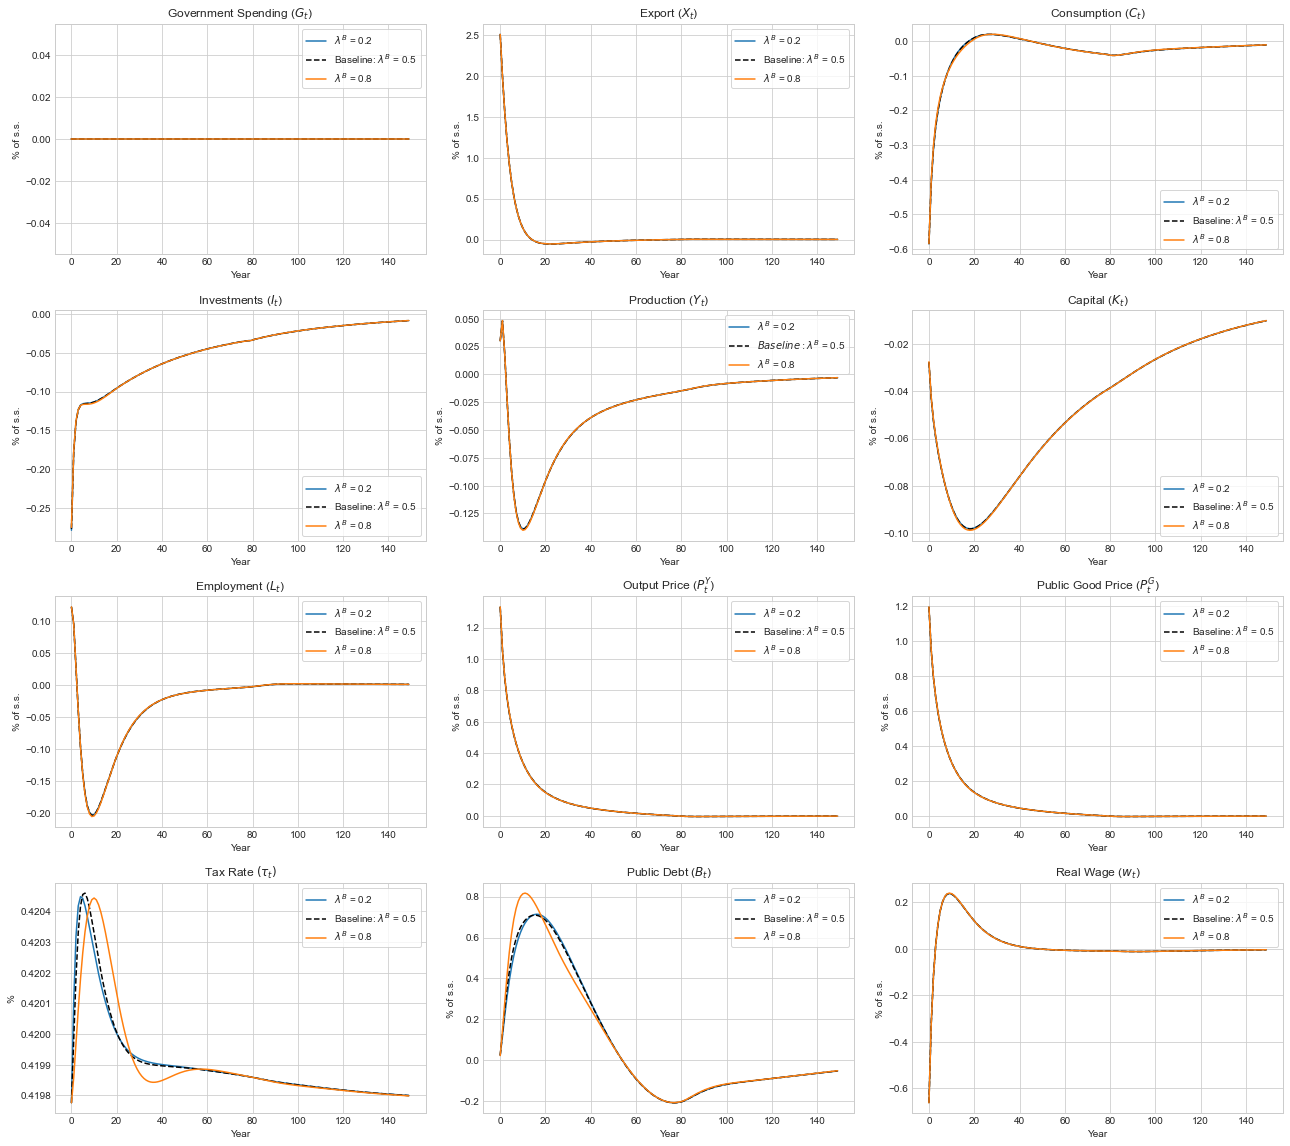

In [54]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,4*6/1.5))

ax = fig.add_subplot(4,3,1)
ax.plot((Models[0].sol.G[:T_IRF]/Models[0].ss.G-1)*100,label=f'$\lambda^B$ = {Models[0].par.lambda_B}')
ax.plot((Models[1].sol.G[:T_IRF]/Models[1].ss.G-1)*100,label=f'Baseline: $\lambda^B$ = {Models[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.G[:T_IRF]/Models[2].ss.G-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Government Spending ($G_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'$\lambda^B$ = {Models[0].par.lambda_B}')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'Baseline: $\lambda^B$ = {Models[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Export ($X_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,3)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'$\lambda^B$ = {Models[0].par.lambda_B}')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'Baseline: $\lambda^B$ = {Models[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Consumption ($C_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,4)
ax.plot((Models[0].sol.I[:T_IRF]/Models[0].ss.I-1)*100,label=f'$\lambda^B$ = {Models[0].par.lambda_B}')
ax.plot((Models[1].sol.I[:T_IRF]/Models[1].ss.I-1)*100,label=f'Baseline: $\lambda^B$ = {Models[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.I[:T_IRF]/Models[2].ss.I-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Investments ($I_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,5)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$\lambda^B$ = {Models[0].par.lambda_B}')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$Baseline: \lambda^B$ = {Models[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,6)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'$\lambda^B$ = {Models[0].par.lambda_B}')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'Baseline: $\lambda^B$ = {Models[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Capital ($K_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,7)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'$\lambda^B$ = {Models[0].par.lambda_B}')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'Baseline: $\lambda^B$ = {Models[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Employment ($L_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,8)
ax.plot((Models[0].sol.P_Y[:T_IRF]/Models[0].ss.P_Y-1)*100,label=f'$\lambda^B$ = {Models[0].par.lambda_B}')
ax.plot((Models[1].sol.P_Y[:T_IRF]/Models[1].ss.P_Y-1)*100,label=f'Baseline: $\lambda^B$ = {Models[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.P_Y[:T_IRF]/Models[2].ss.P_Y-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Output Price ($P^Y_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,9)
ax.plot((Models[0].sol.P_G[:T_IRF]/Models[0].ss.P_G-1)*100,label=f'$\lambda^B$ = {Models[0].par.lambda_B}')
ax.plot((Models[1].sol.P_G[:T_IRF]/Models[1].ss.P_G-1)*100,label=f'Baseline: $\lambda^B$ = {Models[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.P_G[:T_IRF]/Models[2].ss.P_G-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Public Good Price ($P^G_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,10)
ax.plot(Models[0].sol.tau[:T_IRF],label=f'$\lambda^B$ = {Models[0].par.lambda_B}')
ax.plot(Models[1].sol.tau[:T_IRF],label=f'Baseline: $\lambda^B$ = {Models[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot(Models[2].sol.tau[:T_IRF],label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.set_ylabel('%')
ax.set_xlabel('Year')
ax.set_title('Tax Rate'+r' $ (\tau_t) $')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,11)
ax.plot((Models[0].sol.B[:T_IRF]/Models[0].ss.B-1)*100,label=f'$\lambda^B$ = {Models[0].par.lambda_B}')
ax.plot((Models[1].sol.B[:T_IRF]/Models[1].ss.B-1)*100,label=f'Baseline: $\lambda^B$ = {Models[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.B[:T_IRF]/Models[2].ss.B-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Public Debt ($B_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,12)
ax.plot((Models[0].sol.real_W[:T_IRF]/Models[0].ss.real_W-1)*100,label=f'$\lambda^B$ = {Models[0].par.lambda_B}')
ax.plot((Models[1].sol.real_W[:T_IRF]/Models[1].ss.real_W-1)*100,label=f'Baseline: $\lambda^B$ = {Models[1].par.lambda_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.real_W[:T_IRF]/Models[2].ss.real_W-1)*100,label=f'$\lambda^B$ = {Models[2].par.lambda_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Real Wage ($w_{t}$)')
ax.legend(frameon=True)

# c. layout
fig.tight_layout(pad=1); # spacing between subplots
plt.savefig("RobustnessTestExportShock/Tax_Rigidity.pdf", format="pdf", bbox_inches="tight")

## Change in Capital Adjustment Costs

In [55]:
model.set_exo_ss() # reset 

In [56]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()

In [57]:
Models = [model, model1, model2]
Psi_0 = [3.0, 4.0, 15.0] 
    
for i in range(len(Models)):
    Models[i].par.Psi_0 = Psi_0[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models[i].sol.chi[:Tshock] = Models[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models[i].sol.P_F[:Tshock] = Models[i].ss.P_F + shock_p_f*persistence_p_f
    Models[i].find_IRF()

initial:
   max. abs. error = 2.65e+00
    0.00e+00 in bargaining_cond
    1.43e-11 in Bq_match
    3.33e-16 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    2.65e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.65e+00
    2.83e-04 in bargaining_cond
    3.38e-02 in Bq_match
    2.23e-04 in FOC_capital_agency
    7.42e-03 in FOC_K_ell
    1.77e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.77e-01
    3.78e-05 in bargaining_cond
    1.47e-03 in Bq_match
    3.91e-05 in FOC_capital_agency
    9.22e-04 in FOC_K_ell
    1.31e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.31e-02
    3.07e-06 in bargaining_cond
    1.80e-04 in Bq_match
    3.23e-06 in FOC_capital_agency
    7.16e-05 in FOC_K_ell
    1.12e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

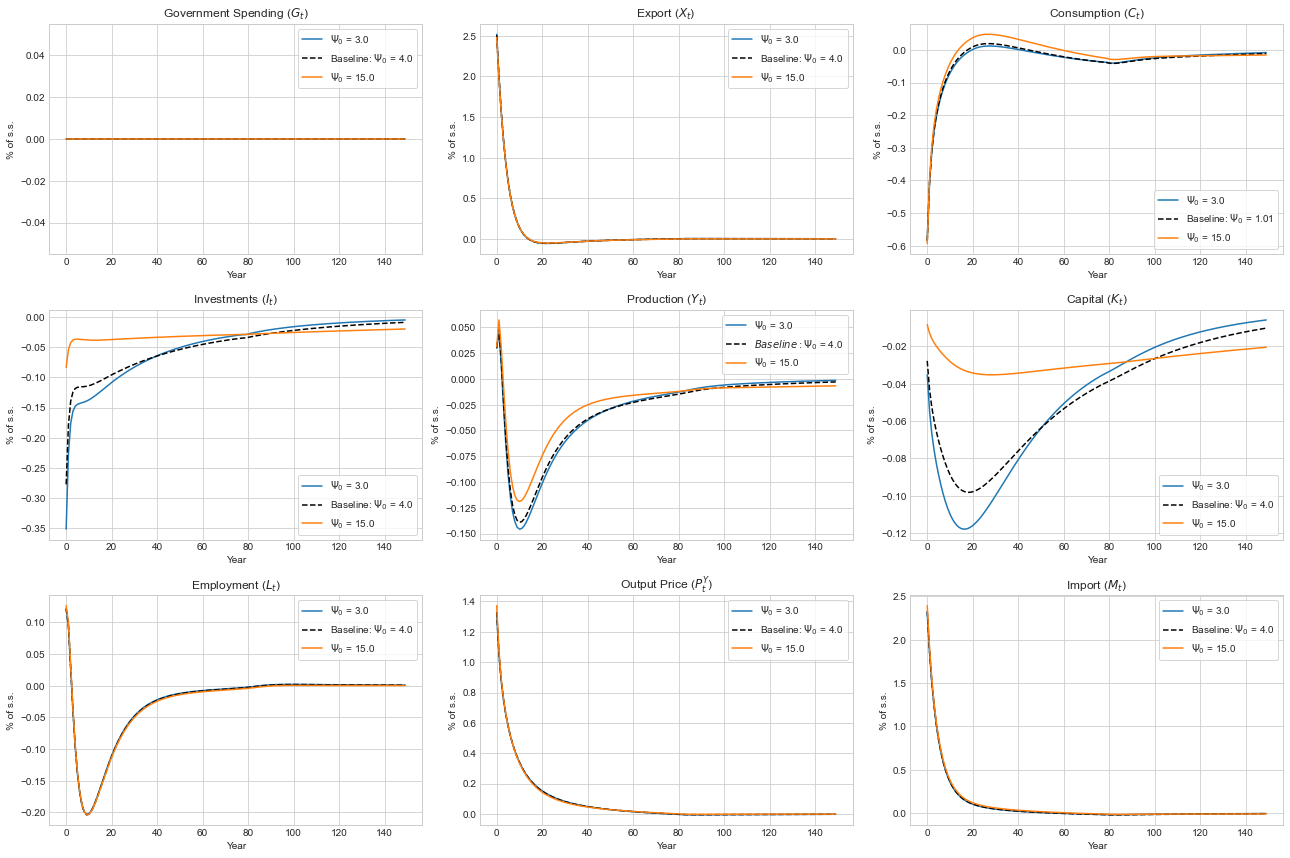

In [58]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,3,1)
ax.plot((Models[0].sol.G[:T_IRF]/Models[0].ss.G-1)*100,label=f'$\Psi_0$ = {Models[0].par.Psi_0}')
ax.plot((Models[1].sol.G[:T_IRF]/Models[1].ss.G-1)*100,label=f'Baseline: $\Psi_0$ = {Models[1].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.G[:T_IRF]/Models[2].ss.G-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Government Spending ($G_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'$\Psi_0$ = {Models[0].par.Psi_0}')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'Baseline: $\Psi_0$ = {Models[1].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Export ($X_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,3)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'$\Psi_0$ = {Models[0].par.Psi_0}')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'Baseline: $\Psi_0$ = {Models[1].par.sigma_Y}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Consumption ($C_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,4)
ax.plot((Models[0].sol.I[:T_IRF]/Models[0].ss.I-1)*100,label=f'$\Psi_0$ = {Models[0].par.Psi_0}')
ax.plot((Models[1].sol.I[:T_IRF]/Models[1].ss.I-1)*100,label=f'Baseline: $\Psi_0$ = {Models[1].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.I[:T_IRF]/Models[2].ss.I-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Investments ($I_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,5)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$\Psi_0$ = {Models[0].par.Psi_0}')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$Baseline: \Psi_0$ = {Models[1].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,6)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'$\Psi_0$ = {Models[0].par.Psi_0}')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'Baseline: $\Psi_0$ = {Models[1].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Capital ($K_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,7)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'$\Psi_0$ = {Models[0].par.Psi_0}')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'Baseline: $\Psi_0$ = {Models[1].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Employment ($L_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,8)
ax.plot((Models[0].sol.P_Y[:T_IRF]/Models[0].ss.P_Y-1)*100,label=f'$\Psi_0$ = {Models[0].par.Psi_0}')
ax.plot((Models[1].sol.P_Y[:T_IRF]/Models[1].ss.P_Y-1)*100,label=f'Baseline: $\Psi_0$ = {Models[1].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.P_Y[:T_IRF]/Models[2].ss.P_Y-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Output Price ($P^Y_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,9)
ax.plot((Models[0].sol.M[:T_IRF]/Models[0].ss.M-1)*100,label=f'$\Psi_0$ = {Models[0].par.Psi_0}')
ax.plot((Models[1].sol.M[:T_IRF]/Models[1].ss.M-1)*100,label=f'Baseline: $\Psi_0$ = {Models[1].par.Psi_0}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.M[:T_IRF]/Models[2].ss.M-1)*100,label=f'$\Psi_0$ = {Models[2].par.Psi_0}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Import ($M_t$)')
ax.legend(frameon=True)

# c. layout
fig.tight_layout(pad=1); # spacing between subplots
plt.savefig("RobustnessTestExportShock/Capital_Adjustment_Costs.pdf", format="pdf", bbox_inches="tight")

# Extra Sensitivity Analysis

## Change in Tax Elasticity

In [59]:
model.set_exo_ss() # reset 

In [60]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()

In [61]:
Models = [model, model1, model2] 
Sigma_B = [0.1, 0.2, 0.5] 
    
for i in range(len(Models)):
    Models[i].par.sigma_B = Sigma_B[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models[i].sol.chi[:Tshock] = Models[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models[i].sol.P_F[:Tshock] = Models[i].ss.P_F + shock_p_f*persistence_p_f
    Models[i].find_IRF()

initial:
   max. abs. error = 2.65e+00
    0.00e+00 in bargaining_cond
    1.43e-11 in Bq_match
    4.44e-16 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    2.65e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.2 secs
   max. abs. error = 2.65e+00
    2.93e-04 in bargaining_cond
    3.49e-02 in Bq_match
    2.29e-04 in FOC_capital_agency
    7.69e-03 in FOC_K_ell
    1.82e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.2 secs
   max. abs. error = 1.82e-01
    4.10e-05 in bargaining_cond
    1.72e-03 in Bq_match
    4.18e-05 in FOC_capital_agency
    1.00e-03 in FOC_K_ell
    1.43e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.2 secs
   max. abs. error = 1.43e-02
    3.13e-06 in bargaining_cond
    2.07e-04 in Bq_match
    3.31e-06 in FOC_capital_agency
    7.29e-05 in FOC_K_ell
    1.13e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

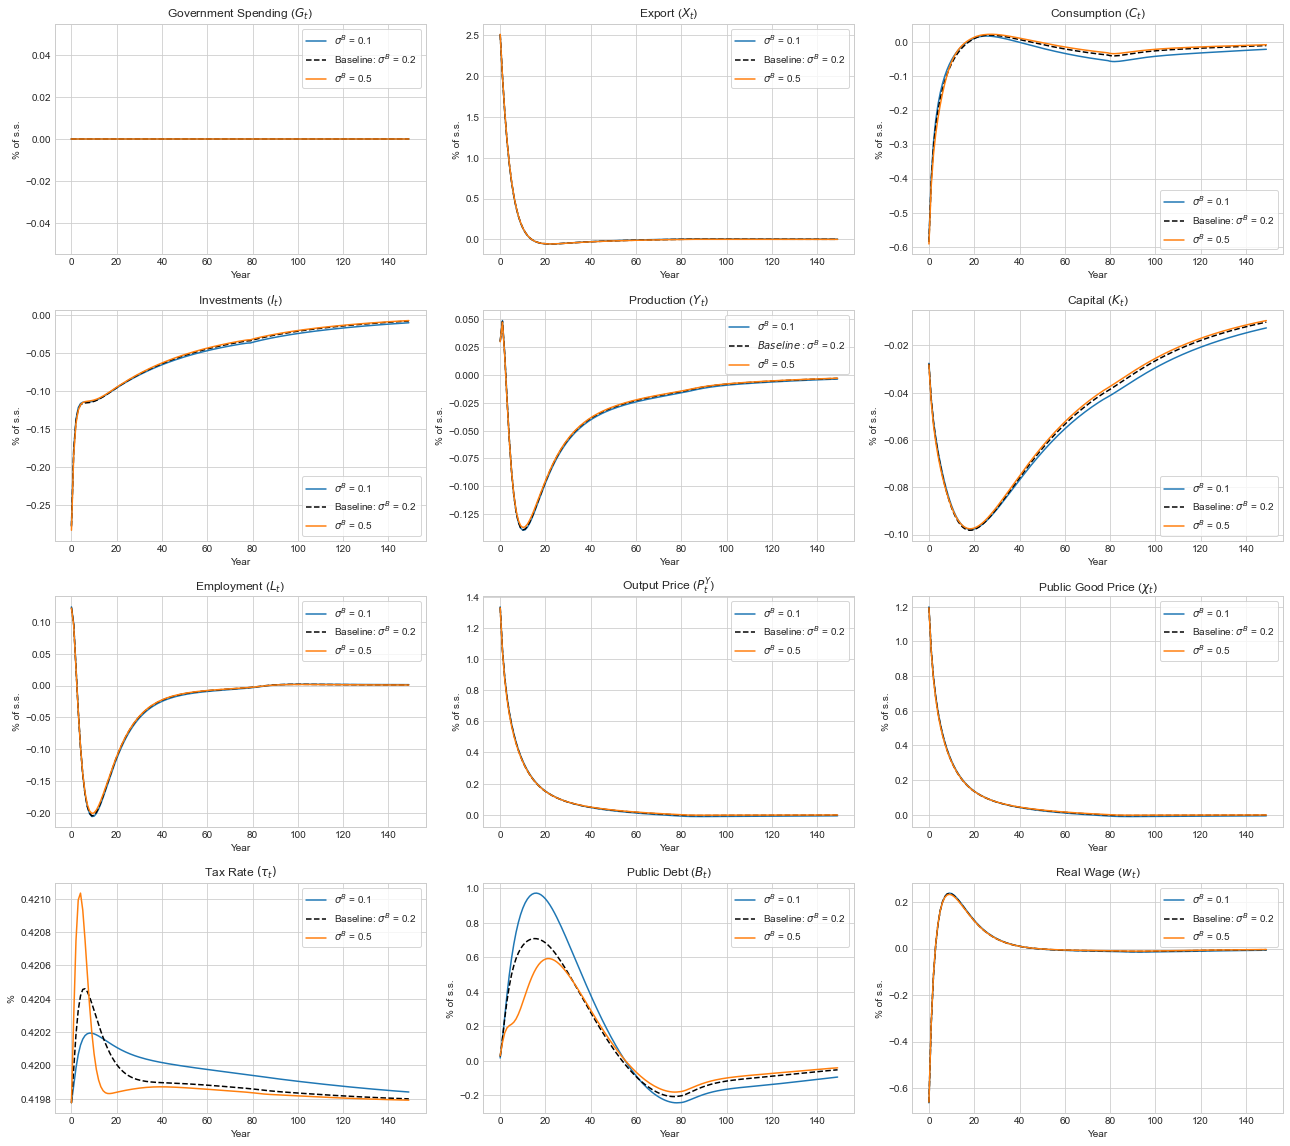

In [62]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,4*6/1.5))

ax = fig.add_subplot(4,3,1)
ax.plot((Models[0].sol.G[:T_IRF]/Models[0].ss.G-1)*100,label=f'$\sigma^B$ = {Models[0].par.sigma_B}')
ax.plot((Models[1].sol.G[:T_IRF]/Models[1].ss.G-1)*100,label=f'Baseline: $\sigma^B$ = {Models[1].par.sigma_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.G[:T_IRF]/Models[2].ss.G-1)*100,label=f'$\sigma^B$ = {Models[2].par.sigma_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Government Spending ($G_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'$\sigma^B$ = {Models[0].par.sigma_B}')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'Baseline: $\sigma^B$ = {Models[1].par.sigma_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\sigma^B$ = {Models[2].par.sigma_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Export ($X_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,3)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'$\sigma^B$ = {Models[0].par.sigma_B}')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'Baseline: $\sigma^B$ = {Models[1].par.sigma_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\sigma^B$ = {Models[2].par.sigma_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Consumption ($C_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,4)
ax.plot((Models[0].sol.I[:T_IRF]/Models[0].ss.I-1)*100,label=f'$\sigma^B$ = {Models[0].par.sigma_B}')
ax.plot((Models[1].sol.I[:T_IRF]/Models[1].ss.I-1)*100,label=f'Baseline: $\sigma^B$ = {Models[1].par.sigma_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.I[:T_IRF]/Models[2].ss.I-1)*100,label=f'$\sigma^B$ = {Models[2].par.sigma_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Investments ($I_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,5)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$\sigma^B$ = {Models[0].par.sigma_B}')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$Baseline: \sigma^B$ = {Models[1].par.sigma_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\sigma^B$ = {Models[2].par.sigma_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,6)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'$\sigma^B$ = {Models[0].par.sigma_B}')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'Baseline: $\sigma^B$ = {Models[1].par.sigma_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\sigma^B$ = {Models[2].par.sigma_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Capital ($K_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,7)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'$\sigma^B$ = {Models[0].par.sigma_B}')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'Baseline: $\sigma^B$ = {Models[1].par.sigma_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\sigma^B$ = {Models[2].par.sigma_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Employment ($L_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,8)
ax.plot((Models[0].sol.P_Y[:T_IRF]/Models[0].ss.P_Y-1)*100,label=f'$\sigma^B$ = {Models[0].par.sigma_B}')
ax.plot((Models[1].sol.P_Y[:T_IRF]/Models[1].ss.P_Y-1)*100,label=f'Baseline: $\sigma^B$ = {Models[1].par.sigma_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.P_Y[:T_IRF]/Models[2].ss.P_Y-1)*100,label=f'$\sigma^B$ = {Models[2].par.sigma_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Output Price ($P^Y_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,9)
ax.plot((Models[0].sol.P_G[:T_IRF]/Models[0].ss.P_G-1)*100,label=f'$\sigma^B$ = {Models[0].par.sigma_B}')
ax.plot((Models[1].sol.P_G[:T_IRF]/Models[1].ss.P_G-1)*100,label=f'Baseline: $\sigma^B$ = {Models[1].par.sigma_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.P_G[:T_IRF]/Models[2].ss.P_G-1)*100,label=f'$\sigma^B$ = {Models[2].par.sigma_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Public Good Price ($\chi_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,10)
ax.plot(Models[0].sol.tau[:T_IRF],label=f'$\sigma^B$ = {Models[0].par.sigma_B}')
ax.plot(Models[1].sol.tau[:T_IRF],label=f'Baseline: $\sigma^B$ = {Models[1].par.sigma_B}', color = 'k', linestyle = '--')
ax.plot(Models[2].sol.tau[:T_IRF],label=f'$\sigma^B$ = {Models[2].par.sigma_B}')
ax.set_ylabel('%')
ax.set_xlabel('Year')
ax.set_title('Tax Rate'+r' $ (\tau_t) $')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,11)
ax.plot((Models[0].sol.B[:T_IRF]/Models[0].ss.B-1)*100,label=f'$\sigma^B$ = {Models[0].par.sigma_B}')
ax.plot((Models[1].sol.B[:T_IRF]/Models[1].ss.B-1)*100,label=f'Baseline: $\sigma^B$ = {Models[1].par.sigma_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.B[:T_IRF]/Models[2].ss.B-1)*100,label=f'$\sigma^B$ = {Models[2].par.sigma_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Public Debt ($B_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,12)
ax.plot((Models[0].sol.real_W[:T_IRF]/Models[0].ss.real_W-1)*100,label=f'$\sigma^B$ = {Models[0].par.sigma_B}')
ax.plot((Models[1].sol.real_W[:T_IRF]/Models[1].ss.real_W-1)*100,label=f'Baseline: $\sigma^B$ = {Models[1].par.sigma_B}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.real_W[:T_IRF]/Models[2].ss.real_W-1)*100,label=f'$\sigma^B$ = {Models[2].par.sigma_B}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Real Wage ($w_{t}$)')
ax.legend(frameon=True)

# c. layout
fig.tight_layout(pad=1); # spacing between subplots
plt.savefig("RobustnessTestExportShock/Tax_Elasticity.pdf", format="pdf", bbox_inches="tight")

## Change in HtM-Share - Background

In [148]:
model.set_exo_ss() # reset 

In [149]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()

In [ ]:
Models = [model, model1, model2]
Lambda = [0.05, 0.2, 0.5] 
    
for i in range(len(Models)):
    Models[i].par.Lambda = Lambda[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models[i].sol.chi[:Tshock] = Models[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models[i].sol.P_F[:Tshock] = Models[i].ss.P_F + shock_p_f*persistence_p_f
    Models[i].find_IRF()

initial:
   max. abs. error = 2.63e+00
    0.00e+00 in bargaining_cond
    1.76e-11 in Bq_match
    4.44e-16 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    2.63e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.63e+00
    2.84e-04 in bargaining_cond
    3.93e-02 in Bq_match
    2.23e-04 in FOC_capital_agency
    7.45e-03 in FOC_K_ell
    1.76e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.2 secs
   max. abs. error = 1.76e-01
    3.84e-05 in bargaining_cond
    1.81e-03 in Bq_match
    3.94e-05 in FOC_capital_agency
    9.36e-04 in FOC_K_ell
    1.32e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.2 secs
   max. abs. error = 1.32e-02
    2.92e-06 in bargaining_cond
    2.00e-04 in Bq_match
    3.09e-06 in FOC_capital_agency
    6.80e-05 in FOC_K_ell
    1.06e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

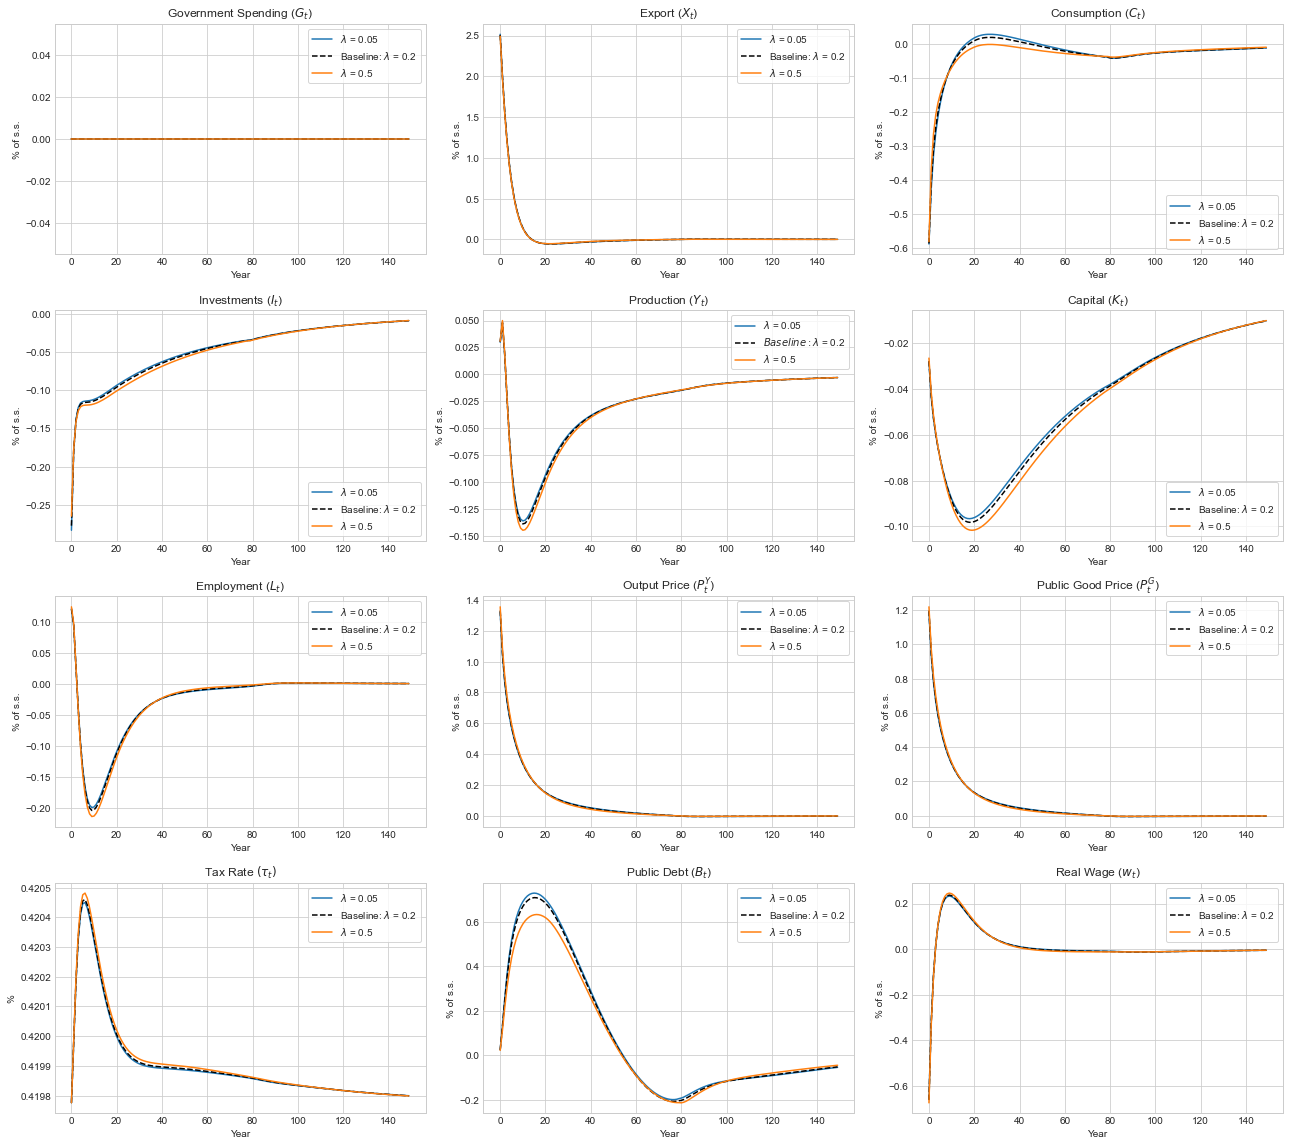

In [152]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,4*6/1.5))

ax = fig.add_subplot(4,3,1)
ax.plot((Models[0].sol.G[:T_IRF]/Models[0].ss.G-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.G[:T_IRF]/Models[1].ss.G-1)*100,label=f'Baseline: $\lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.G[:T_IRF]/Models[2].ss.G-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Government Spending ($G_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'Baseline: $\lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Export ($X_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,3)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'Baseline: $\lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Consumption ($C_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,4)
ax.plot((Models[0].sol.I[:T_IRF]/Models[0].ss.I-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.I[:T_IRF]/Models[1].ss.I-1)*100,label=f'Baseline: $\lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.I[:T_IRF]/Models[2].ss.I-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Investments ($I_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,5)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$Baseline: \lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,6)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'Baseline: $\lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Capital ($K_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,7)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'Baseline: $\lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Employment ($L_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,8)
ax.plot((Models[0].sol.P_Y[:T_IRF]/Models[0].ss.P_Y-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.P_Y[:T_IRF]/Models[1].ss.P_Y-1)*100,label=f'Baseline: $\lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.P_Y[:T_IRF]/Models[2].ss.P_Y-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Output Price ($P^Y_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,9)
ax.plot((Models[0].sol.P_G[:T_IRF]/Models[0].ss.P_G-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.P_G[:T_IRF]/Models[1].ss.P_G-1)*100,label=f'Baseline: $\lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.P_G[:T_IRF]/Models[2].ss.P_G-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Public Good Price ($P^G_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,10)
ax.plot(Models[0].sol.tau[:T_IRF],label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot(Models[1].sol.tau[:T_IRF],label=f'Baseline: $\lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot(Models[2].sol.tau[:T_IRF],label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('%')
ax.set_xlabel('Year')
ax.set_title('Tax Rate'+r' $ (\tau_t) $')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,11)
ax.plot((Models[0].sol.B[:T_IRF]/Models[0].ss.B-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.B[:T_IRF]/Models[1].ss.B-1)*100,label=f'Baseline: $\lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.B[:T_IRF]/Models[2].ss.B-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Public Debt ($B_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,12)
ax.plot((Models[0].sol.real_W[:T_IRF]/Models[0].ss.real_W-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.real_W[:T_IRF]/Models[1].ss.real_W-1)*100,label=f'Baseline: $\lambda$ = {Models[1].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.real_W[:T_IRF]/Models[2].ss.real_W-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Real Wage ($w_{t}$)')
ax.legend(frameon=True)

# c. layout
fig.tight_layout(pad=1); # spacing between subplots
plt.savefig("RobustnessTestExportShock/HtM_ShareBackground.pdf", format="pdf", bbox_inches="tight")

## Change in Export Rigidity

In [67]:
model.set_exo_ss() # reset 

In [68]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()

In [69]:
Models = [model, model1, model2] #Create list of the models
Lambda_X = [0.1, 0.5, 0.8] #Create list of Lambda values
    
for i in range(len(Models)):
    Models[i].par.lambda_X = Lambda_X[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Tshock = 50
    shock_chi = 0.01*Models[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models[i].sol.chi[:Tshock] = Models[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*Models[i].ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models[i].sol.P_F[:Tshock] = Models[i].ss.P_F + shock_p_f*persistence_p_f
    Models[i].find_IRF()

initial:
   max. abs. error = 1.19e+01
    0.00e+00 in bargaining_cond
    1.43e-11 in Bq_match
    4.44e-16 in FOC_capital_agency
    3.38e-14 in FOC_K_ell
    1.19e+01 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.19e+01
    1.63e-03 in bargaining_cond
    2.30e-01 in Bq_match
    1.52e-03 in FOC_capital_agency
    4.29e-02 in FOC_K_ell
    1.64e+00 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.64e+00
    4.76e-04 in bargaining_cond
    2.33e-02 in Bq_match
    5.42e-04 in FOC_capital_agency
    1.14e-02 in FOC_K_ell
    2.59e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.59e-01
    8.18e-05 in bargaining_cond
    9.16e-03 in Bq_match
    8.01e-05 in FOC_capital_agency
    1.84e-03 in FOC_K_ell
    4.76e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

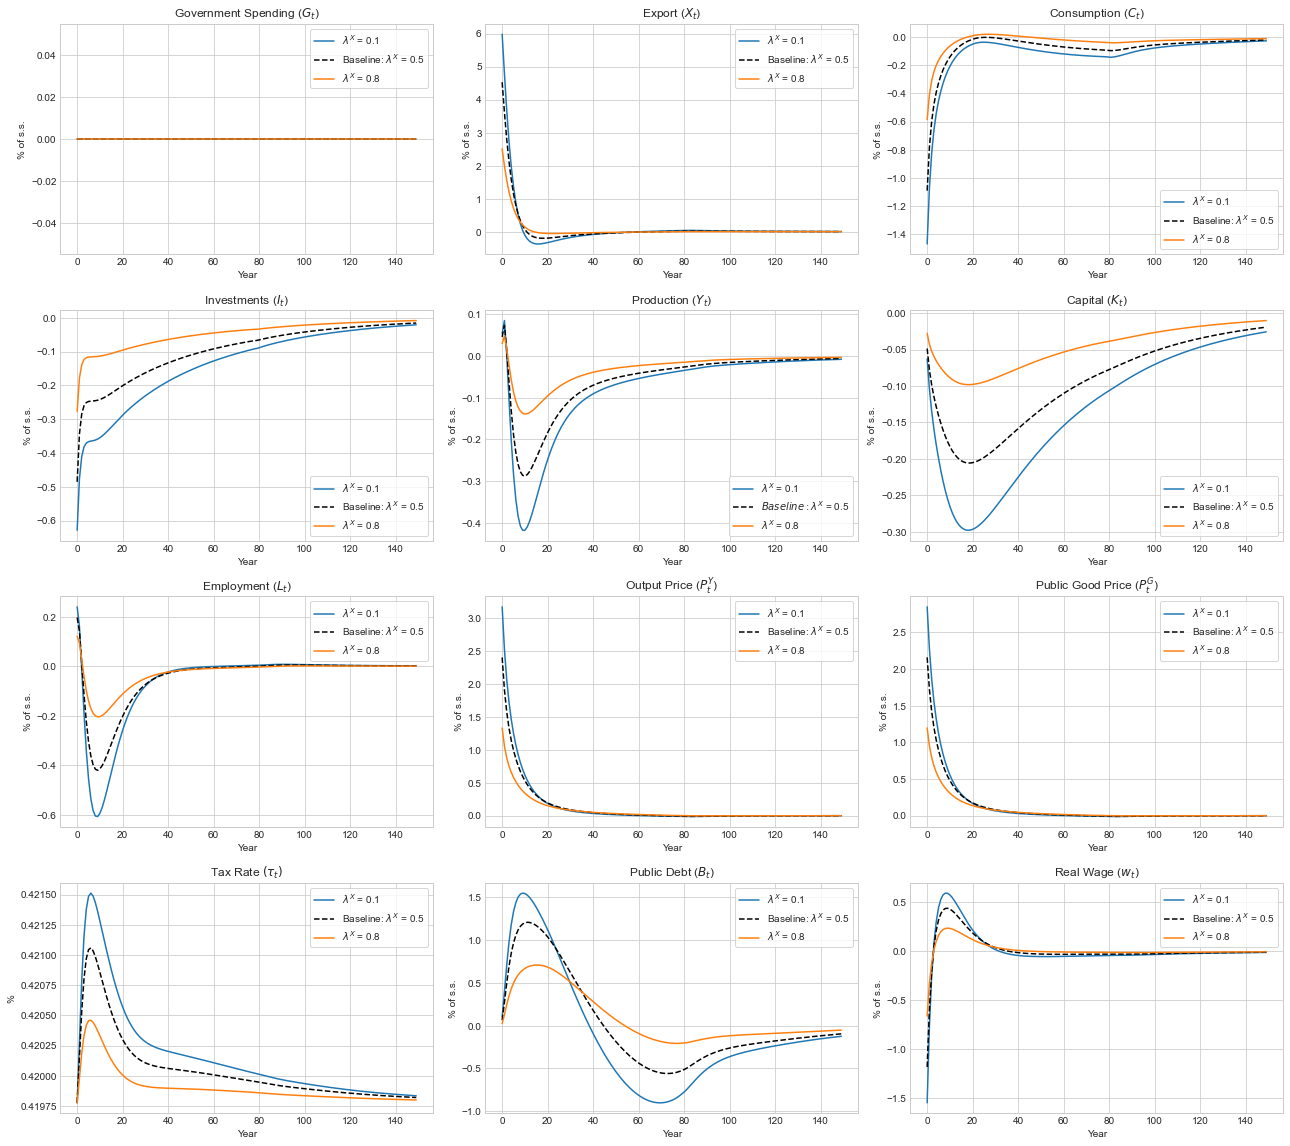

In [70]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,4*6/1.5))

ax = fig.add_subplot(4,3,1)
ax.plot((Models[0].sol.G[:T_IRF]/Models[0].ss.G-1)*100,label=f'$\lambda^X$ = {Models[0].par.lambda_X}')
ax.plot((Models[1].sol.G[:T_IRF]/Models[1].ss.G-1)*100,label=f'Baseline: $\lambda^X$ = {Models[1].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.G[:T_IRF]/Models[2].ss.G-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Government Spending ($G_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'$\lambda^X$ = {Models[0].par.lambda_X}')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'Baseline: $\lambda^X$ = {Models[1].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Export ($X_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,3)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'$\lambda^X$ = {Models[0].par.lambda_X}')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'Baseline: $\lambda^X$ = {Models[1].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Consumption ($C_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,4)
ax.plot((Models[0].sol.I[:T_IRF]/Models[0].ss.I-1)*100,label=f'$\lambda^X$ = {Models[0].par.lambda_X}')
ax.plot((Models[1].sol.I[:T_IRF]/Models[1].ss.I-1)*100,label=f'Baseline: $\lambda^X$ = {Models[1].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.I[:T_IRF]/Models[2].ss.I-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Investments ($I_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,5)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$\lambda^X$ = {Models[0].par.lambda_X}')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$Baseline: \lambda^X$ = {Models[1].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Production ($Y_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,6)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'$\lambda^X$ = {Models[0].par.lambda_X}')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'Baseline: $\lambda^X$ = {Models[1].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Capital ($K_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,7)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'$\lambda^X$ = {Models[0].par.lambda_X}')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'Baseline: $\lambda^X$ = {Models[1].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Employment ($L_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,8)
ax.plot((Models[0].sol.P_Y[:T_IRF]/Models[0].ss.P_Y-1)*100,label=f'$\lambda^X$ = {Models[0].par.lambda_X}')
ax.plot((Models[1].sol.P_Y[:T_IRF]/Models[1].ss.P_Y-1)*100,label=f'Baseline: $\lambda^X$ = {Models[1].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.P_Y[:T_IRF]/Models[2].ss.P_Y-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Output Price ($P^Y_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,9)
ax.plot((Models[0].sol.P_G[:T_IRF]/Models[0].ss.P_G-1)*100,label=f'$\lambda^X$ = {Models[0].par.lambda_X}')
ax.plot((Models[1].sol.P_G[:T_IRF]/Models[1].ss.P_G-1)*100,label=f'Baseline: $\lambda^X$ = {Models[1].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.P_G[:T_IRF]/Models[2].ss.P_G-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Public Good Price ($P^G_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,10)
ax.plot(Models[0].sol.tau[:T_IRF],label=f'$\lambda^X$ = {Models[0].par.lambda_X}')
ax.plot(Models[1].sol.tau[:T_IRF],label=f'Baseline: $\lambda^X$ = {Models[1].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot(Models[2].sol.tau[:T_IRF],label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.set_ylabel('%')
ax.set_xlabel('Year')
ax.set_title('Tax Rate'+r' $ (\tau_t) $')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,11)
ax.plot((Models[0].sol.B[:T_IRF]/Models[0].ss.B-1)*100,label=f'$\lambda^X$ = {Models[0].par.lambda_X}')
ax.plot((Models[1].sol.B[:T_IRF]/Models[1].ss.B-1)*100,label=f'Baseline: $\lambda^X$ = {Models[1].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.B[:T_IRF]/Models[2].ss.B-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Public Debt ($B_{t}$)')
ax.legend(frameon=True)

ax = fig.add_subplot(4,3,12)
ax.plot((Models[0].sol.real_W[:T_IRF]/Models[0].ss.real_W-1)*100,label=f'$\lambda^X$ = {Models[0].par.lambda_X}')
ax.plot((Models[1].sol.real_W[:T_IRF]/Models[1].ss.real_W-1)*100,label=f'Baseline: $\lambda^X$ = {Models[1].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[2].sol.real_W[:T_IRF]/Models[2].ss.real_W-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_xlabel('Year')
ax.set_title('Real Wage ($w_{t}$)')
ax.legend(frameon=True)

# c. layout
fig.tight_layout(pad=1); # spacing between subplots
plt.savefig("RobustnessTestExportShock/Export_Rigidity.pdf", format="pdf", bbox_inches="tight")